In [2]:
# Bid History Engineered Data Analysis
# Comprehensive analysis of engineered features for auction bidding behavior

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

# Load engineered data
print("="*80)
print("LOADING ENGINEERED BID HISTORY DATA")
print("="*80)

data_path = "/workspaces/maxsold/data/engineered_data/bid_history/bid_history_engineered_20251201.parquet"
df = pd.read_parquet(data_path)

print(f"\nData loaded successfully!")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nColumns ({len(df.columns)}):")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

df.head()

LOADING ENGINEERED BID HISTORY DATA

Data loaded successfully!
Shape: 2,107,247 rows × 15 columns

Columns (15):
   1. auction_id
   2. item_id
   3. bid_number
   4. time_of_bid
   5. amount
   6. isproxy
   7. total_bids_for_item
   8. first_bid_time
   9. last_bid_time
  10. hours_since_first_bid
  11. proxy_bid_count
  12. manual_bid_count
  13. proxy_bid_ratio
  14. bid_increment
  15. bid_position_pct


,auction_id,item_id,bid_number,time_of_bid,amount,isproxy,total_bids_for_item,first_bid_time,last_bid_time,hours_since_first_bid,proxy_bid_count,manual_bid_count,proxy_bid_ratio,bid_increment,bid_position_pct
0,36194,3430422,1,2021-10-16 03:28:16-05:00,1.0,False,7,2021-10-16 03:28:16-05:00,2021-10-16 21:49:41-05:00,0.000000,2,5,0.285714,0.0,0.142857
1,36194,3430422,2,2021-10-16 08:55:07-05:00,2.0,False,7,2021-10-16 03:28:16-05:00,2021-10-16 21:49:41-05:00,5.447500,2,5,0.285714,1.0,0.285714
2,36194,3430422,3,2021-10-16 09:25:09-05:00,3.0,False,7,2021-10-16 03:28:16-05:00,2021-10-16 21:49:41-05:00,5.948056,2,5,0.285714,1.0,0.428571
3,36194,3430422,4,2021-10-16 21:49:23-05:00,5.0,False,7,2021-10-16 03:28:16-05:00,2021-10-16 21:49:41-05:00,18.351944,2,5,0.285714,2.0,0.571429
4,36194,3430422,5,2021-10-16 21:49:23-05:00,6.0,True,7,2021-10-16 03:28:16-05:00,2021-10-16 21:49:41-05:00,18.351944,2,5,0.285714,1.0,0.714286


In [3]:
# Data Overview
print("="*80)
print("DATA OVERVIEW")
print("="*80)

print(f"\nDataset dimensions:")
print(f"  Rows: {df.shape[0]:,}")
print(f"  Columns: {df.shape[1]}")

print(f"\nData types:")
print(df.dtypes.value_counts())

print(f"\nMemory usage:")
print(f"  {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\nMissing values:")
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("  No missing values!")

print(f"\nBasic statistics:")
print(f"  Total bids: {len(df):,}")
print(f"  Unique auctions: {df['auction_id'].nunique():,}")
print(f"  Unique items: {df['item_id'].nunique():,}")

DATA OVERVIEW

Dataset dimensions:
  Rows: 2,107,247
  Columns: 15

Data types:
float64                                   4
datetime64[us, pytz.FixedOffset(-300)]    3
object                                    2
int64                                     2
Int64                                     2
boolean                                   1
Float64                                   1
Name: count, dtype: int64

Memory usage:
  425.35 MB

Missing values:
  No missing values!

Basic statistics:
  Total bids: 2,107,247
  Unique auctions: 1,914
  Unique items: 210,303


In [4]:
# Verify Bid Number Correction
print("="*80)
print("BID NUMBER CORRECTION VERIFICATION")
print("="*80)

# Sample a few items to verify bid_number
sample_items = df['item_id'].unique()[:5]

print("\nVerifying bid_number (first bid should = 1):")
print("\nSample from 5 random items:")
for item in sample_items:
    item_bids = df[df['item_id'] == item].sort_values('time_of_bid')[
        ['item_id', 'bid_number', 'bid_number', 'time_of_bid', 'amount']
    ].head(3)
    print(f"\nItem {item}:")
    print(item_bids.to_string(index=False))

BID NUMBER CORRECTION VERIFICATION

Verifying bid_number (first bid should = 1):

Sample from 5 random items:

Item 3430422:
item_id  bid_number  bid_number               time_of_bid  amount
3430422           1           1 2021-10-16 03:28:16-05:00     1.0
3430422           2           2 2021-10-16 08:55:07-05:00     2.0
3430422           3           3 2021-10-16 09:25:09-05:00     3.0

Item 3430423:
item_id  bid_number  bid_number               time_of_bid  amount
3430423           1           1 2021-10-20 19:55:27-05:00     1.0
3430423           2           2 2021-10-26 10:51:57-05:00     2.0
3430423           3           3 2021-10-26 17:56:48-05:00     6.5

Item 3430424:
item_id  bid_number  bid_number               time_of_bid  amount
3430424           1           1 2021-10-23 06:26:02-05:00     1.0
3430424           2           2 2021-10-26 18:58:44-05:00     2.0

Item 3430425:
item_id  bid_number  bid_number               time_of_bid  amount
3430425           1           1 2021-1

TOTAL BIDS FOR ITEM ANALYSIS

Total bids per item statistics:
count    210303.000000
mean         10.020052
std           9.698324
min           1.000000
25%           3.000000
50%           8.000000
75%          14.000000
max         157.000000
Name: total_bids_for_item, dtype: float64

Distribution of bid counts:

Bid count distribution (first 20):
total_bids_for_item
1     31766
2     14386
3     12911
4     11608
5     11817
6     10975
7     10605
8      9264
9      8956
10     8527
11     8767
12     8349
13     7785
14     6631
15     5836
16     4929
17     4216
18     3637
19     3117
20     2777

Items by bid count categories:
  1 bid: 31,766 items (15.1%)
  2-5 bids: 50,722 items
  6-10 bids: 48,327 items
  11-20 bids: 56,044 items
  21-50 bids: 22,100 items
  51+ bids: 1,344 items


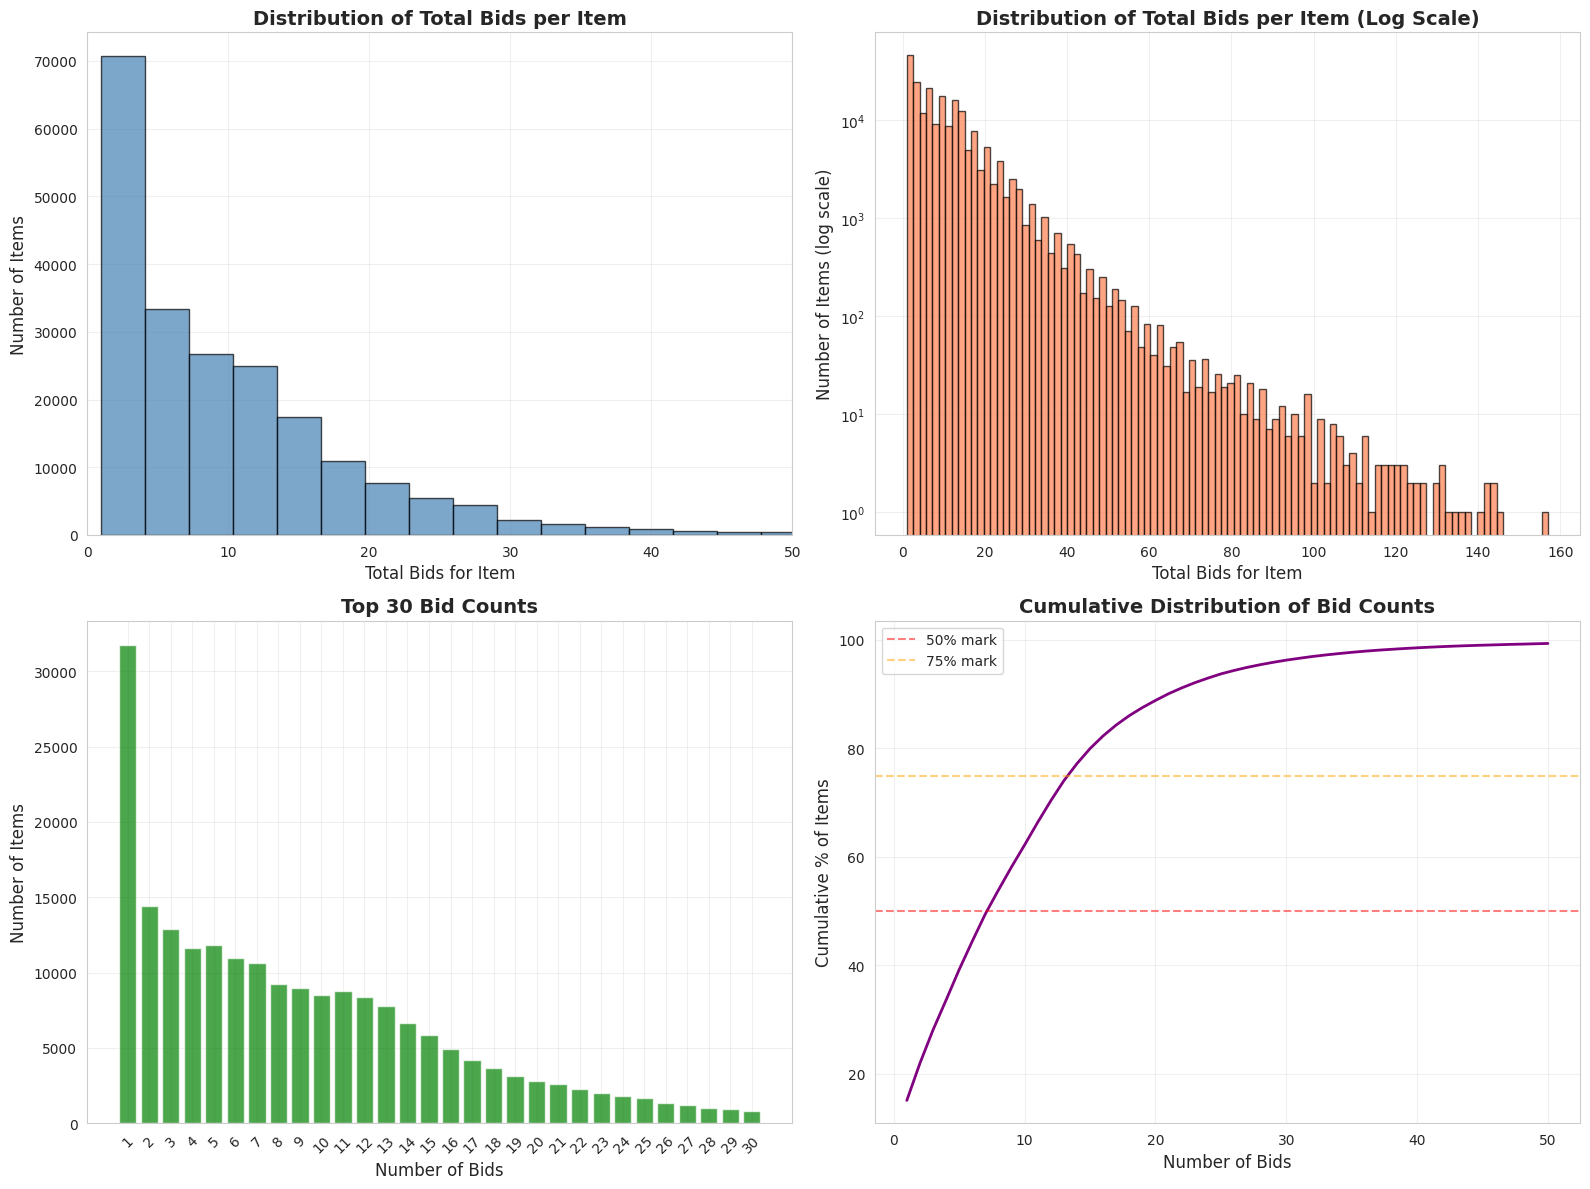

In [5]:
# Total Bids for Item Analysis
print("="*80)
print("TOTAL BIDS FOR ITEM ANALYSIS")
print("="*80)

# Get unique item-level data
item_level = df.groupby('item_id').first().reset_index()

print(f"\nTotal bids per item statistics:")
print(item_level['total_bids_for_item'].describe())

print(f"\nDistribution of bid counts:")
bid_count_dist = item_level['total_bids_for_item'].value_counts().sort_index()
print("\nBid count distribution (first 20):")
print(bid_count_dist.head(20).to_string())

print(f"\nItems by bid count categories:")
print(f"  1 bid: {(item_level['total_bids_for_item'] == 1).sum():,} items ({100*(item_level['total_bids_for_item'] == 1).sum()/len(item_level):.1f}%)")
print(f"  2-5 bids: {((item_level['total_bids_for_item'] >= 2) & (item_level['total_bids_for_item'] <= 5)).sum():,} items")
print(f"  6-10 bids: {((item_level['total_bids_for_item'] >= 6) & (item_level['total_bids_for_item'] <= 10)).sum():,} items")
print(f"  11-20 bids: {((item_level['total_bids_for_item'] >= 11) & (item_level['total_bids_for_item'] <= 20)).sum():,} items")
print(f"  21-50 bids: {((item_level['total_bids_for_item'] >= 21) & (item_level['total_bids_for_item'] <= 50)).sum():,} items")
print(f"  51+ bids: {(item_level['total_bids_for_item'] > 50).sum():,} items")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribution of total bids per item
axes[0, 0].hist(item_level['total_bids_for_item'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_xlabel('Total Bids for Item', fontsize=12)
axes[0, 0].set_ylabel('Number of Items', fontsize=12)
axes[0, 0].set_title('Distribution of Total Bids per Item', fontsize=14, fontweight='bold')
axes[0, 0].set_xlim(0, 50)
axes[0, 0].grid(True, alpha=0.3)

# 2. Log scale
axes[0, 1].hist(item_level['total_bids_for_item'], bins=100, edgecolor='black', alpha=0.7, color='coral')
axes[0, 1].set_xlabel('Total Bids for Item', fontsize=12)
axes[0, 1].set_ylabel('Number of Items (log scale)', fontsize=12)
axes[0, 1].set_title('Distribution of Total Bids per Item (Log Scale)', fontsize=14, fontweight='bold')
axes[0, 1].set_yscale('log')
axes[0, 1].grid(True, alpha=0.3)

# 3. Top 30 bid counts
top_counts = bid_count_dist.head(30)
axes[1, 0].bar(range(len(top_counts)), top_counts.values, color='green', alpha=0.7)
axes[1, 0].set_xlabel('Number of Bids', fontsize=12)
axes[1, 0].set_ylabel('Number of Items', fontsize=12)
axes[1, 0].set_title('Top 30 Bid Counts', fontsize=14, fontweight='bold')
axes[1, 0].set_xticks(range(len(top_counts)))
axes[1, 0].set_xticklabels(top_counts.index, rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# 4. Cumulative distribution
cumsum = bid_count_dist.sort_index().cumsum() / len(item_level) * 100
axes[1, 1].plot(cumsum.index[:50], cumsum.values[:50], linewidth=2, color='purple')
axes[1, 1].set_xlabel('Number of Bids', fontsize=12)
axes[1, 1].set_ylabel('Cumulative % of Items', fontsize=12)
axes[1, 1].set_title('Cumulative Distribution of Bid Counts', fontsize=14, fontweight='bold')
axes[1, 1].axhline(y=50, color='red', linestyle='--', alpha=0.5, label='50% mark')
axes[1, 1].axhline(y=75, color='orange', linestyle='--', alpha=0.5, label='75% mark')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

HOURS SINCE FIRST BID ANALYSIS

hours_since_first_bid statistics:
count    2.107247e+06
mean     9.955186e+01
std      7.628525e+01
min      0.000000e+00
25%      2.781444e+01
50%      9.516083e+01
75%      1.565925e+02
max      3.358661e+02
Name: hours_since_first_bid, dtype: float64


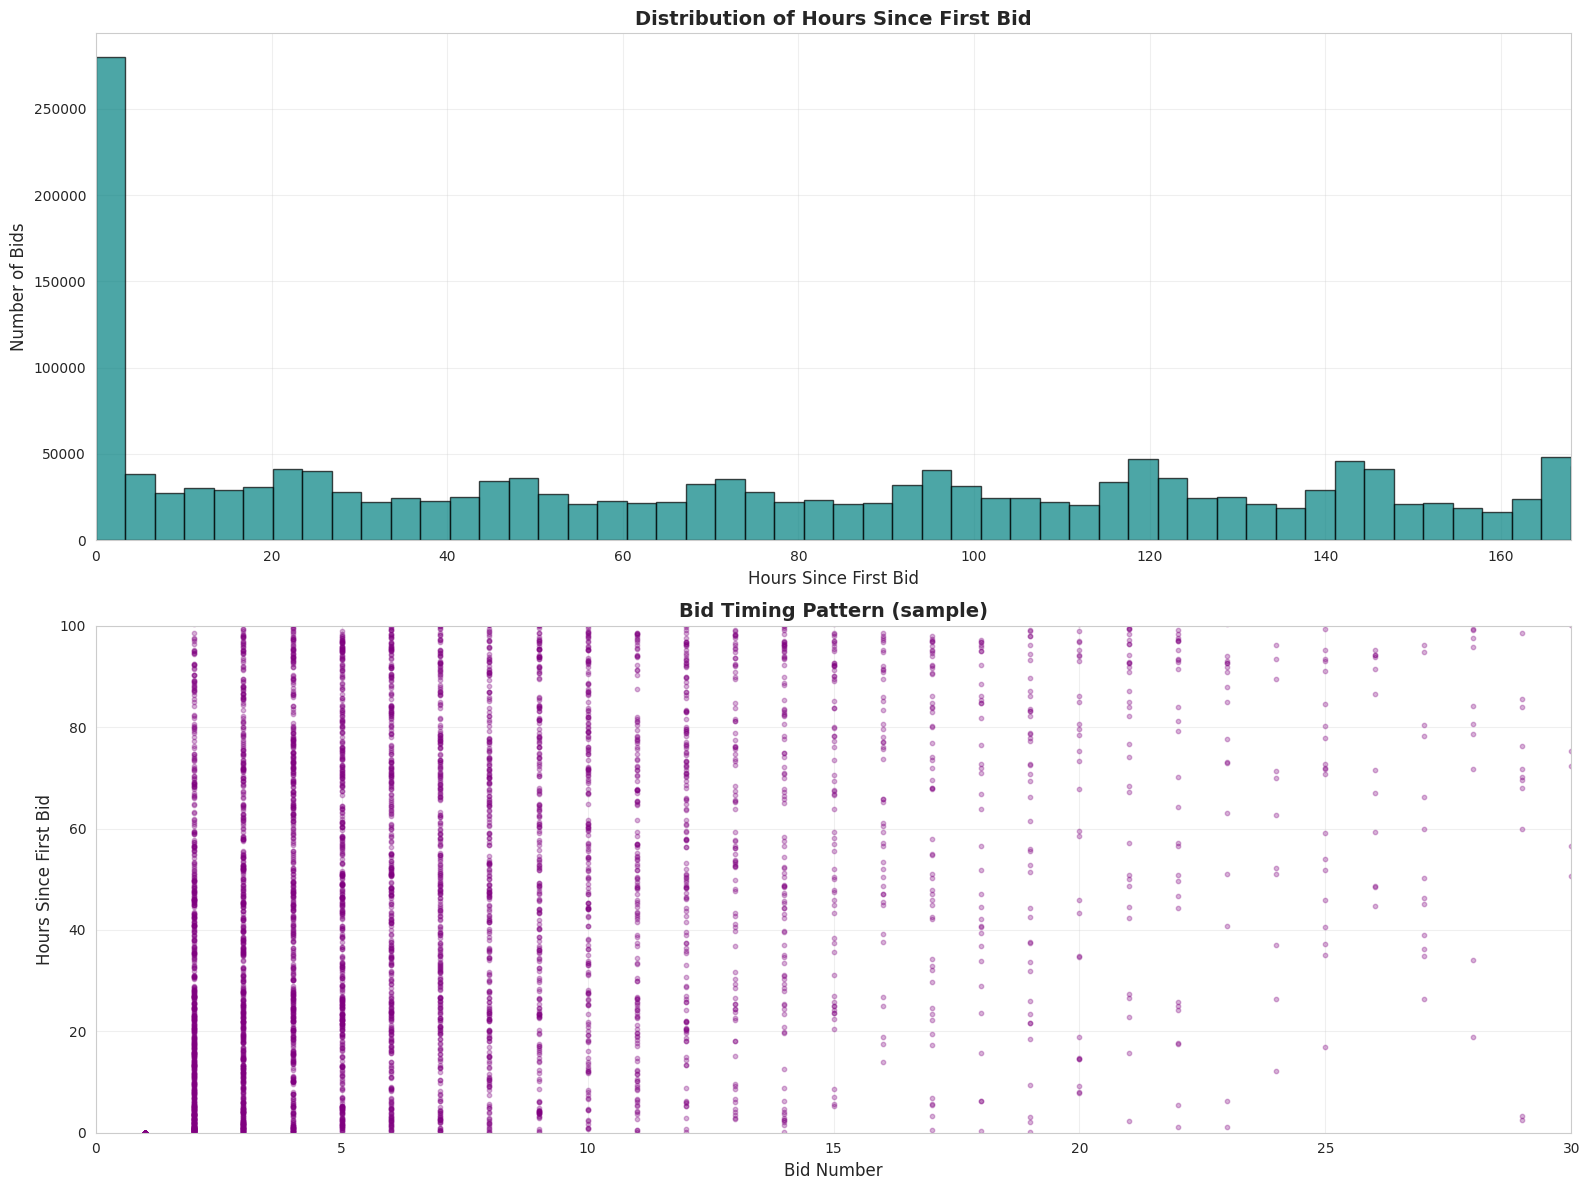

In [6]:
# Hours Since First Bid Analysis
print("="*80)
print("HOURS SINCE FIRST BID ANALYSIS")
print("="*80)

print(f"\nhours_since_first_bid statistics:")
print(df['hours_since_first_bid'].describe())

# Visualizations
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# 1. Hours since first bid distribution
axes[0].hist(df['hours_since_first_bid'], bins=100, edgecolor='black', alpha=0.7, color='teal')
axes[0].set_xlabel('Hours Since First Bid', fontsize=12)
axes[0].set_ylabel('Number of Bids', fontsize=12)
axes[0].set_title('Distribution of Hours Since First Bid', fontsize=14, fontweight='bold')
axes[0].set_xlim(0, 168)  # Cap at 1 week
axes[0].grid(True, alpha=0.3)

# 3. Bid timing pattern (hours since first bid vs bid number)
sample_bids = df[df['total_bids_for_item'] >= 5].sample(min(10000, len(df)))
axes[1].scatter(sample_bids['bid_number'], sample_bids['hours_since_first_bid'], 
                   alpha=0.3, s=10, color='purple')
axes[1].set_xlabel('Bid Number', fontsize=12)
axes[1].set_ylabel('Hours Since First Bid', fontsize=12)
axes[1].set_title('Bid Timing Pattern (sample)', fontsize=14, fontweight='bold')
axes[1].set_xlim(0, 30)
axes[1].set_ylim(0, 100)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

PROXY BID COUNT ANALYSIS

Proxy bid statistics:
  Total bids: 2,107,247

Proxy bid count per item:
count    210303.0
mean      3.26925
std      3.905797
min           0.0
25%           0.0
50%           2.0
75%           5.0
max          63.0
Name: proxy_bid_count, dtype: Float64

Manual bid count per item:
count    210303.0
mean     6.750802
std      5.980082
min           1.0
25%           2.0
50%           5.0
75%           9.0
max          94.0
Name: manual_bid_count, dtype: Float64

Proxy bid ratio per item:
count    210303.0
mean     0.237156
std      0.160018
min           0.0
25%           0.0
50%      0.285714
75%      0.363636
max      0.494505
Name: proxy_bid_ratio, dtype: Float64

Items by proxy bid ratio:
  0% proxy (all manual): 57,122 items
  1-25% proxy: 35,907 items
  26-50% proxy: 117,274 items
  51-75% proxy: 0 items
  76-99% proxy: 0 items
  100% proxy (all proxy): 0 items


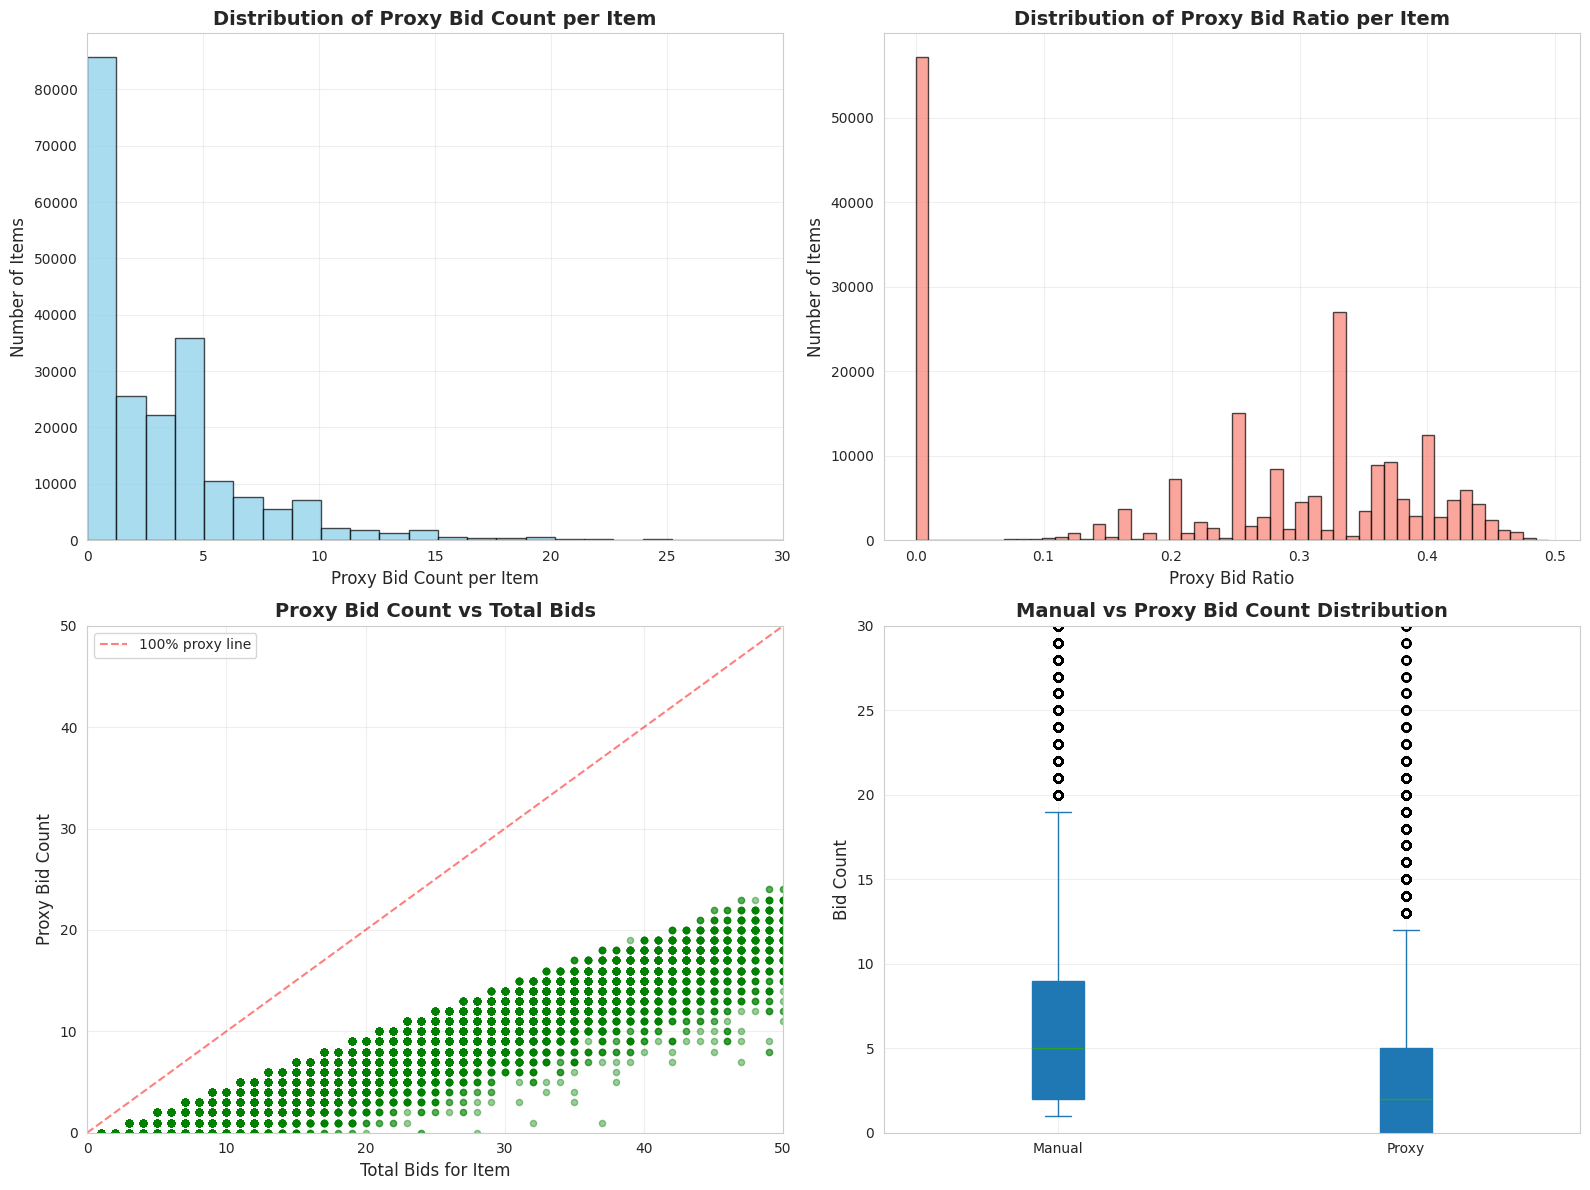


Correlations:
  proxy_bid_count vs total_bids_for_item: 0.9709
  proxy_bid_ratio vs total_bids_for_item: 0.5754


In [7]:
# Proxy Bid Analysis
print("="*80)
print("PROXY BID COUNT ANALYSIS")
print("="*80)

print(f"\nProxy bid statistics:")
print(f"  Total bids: {len(df):,}")

print(f"\nProxy bid count per item:")
print(item_level['proxy_bid_count'].describe())

print(f"\nManual bid count per item:")
print(item_level['manual_bid_count'].describe())

print(f"\nProxy bid ratio per item:")
print(item_level['proxy_bid_ratio'].describe())

print(f"\nItems by proxy bid ratio:")
print(f"  0% proxy (all manual): {(item_level['proxy_bid_ratio'] == 0).sum():,} items")
print(f"  1-25% proxy: {((item_level['proxy_bid_ratio'] > 0) & (item_level['proxy_bid_ratio'] <= 0.25)).sum():,} items")
print(f"  26-50% proxy: {((item_level['proxy_bid_ratio'] > 0.25) & (item_level['proxy_bid_ratio'] <= 0.5)).sum():,} items")
print(f"  51-75% proxy: {((item_level['proxy_bid_ratio'] > 0.5) & (item_level['proxy_bid_ratio'] <= 0.75)).sum():,} items")
print(f"  76-99% proxy: {((item_level['proxy_bid_ratio'] > 0.75) & (item_level['proxy_bid_ratio'] < 1)).sum():,} items")
print(f"  100% proxy (all proxy): {(item_level['proxy_bid_ratio'] == 1).sum():,} items")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Proxy bid count distribution
axes[0, 0].hist(item_level['proxy_bid_count'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].set_xlabel('Proxy Bid Count per Item', fontsize=12)
axes[0, 0].set_ylabel('Number of Items', fontsize=12)
axes[0, 0].set_title('Distribution of Proxy Bid Count per Item', fontsize=14, fontweight='bold')
axes[0, 0].set_xlim(0, 30)
axes[0, 0].grid(True, alpha=0.3)

# 2. Proxy bid ratio distribution
axes[0, 1].hist(item_level['proxy_bid_ratio'], bins=50, edgecolor='black', alpha=0.7, color='salmon')
axes[0, 1].set_xlabel('Proxy Bid Ratio', fontsize=12)
axes[0, 1].set_ylabel('Number of Items', fontsize=12)
axes[0, 1].set_title('Distribution of Proxy Bid Ratio per Item', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Proxy bid count vs total bids
axes[1, 0].scatter(item_level['total_bids_for_item'], item_level['proxy_bid_count'], 
                   alpha=0.4, s=20, color='green')
axes[1, 0].plot([0, 50], [0, 50], 'r--', alpha=0.5, label='100% proxy line')
axes[1, 0].set_xlabel('Total Bids for Item', fontsize=12)
axes[1, 0].set_ylabel('Proxy Bid Count', fontsize=12)
axes[1, 0].set_title('Proxy Bid Count vs Total Bids', fontsize=14, fontweight='bold')
axes[1, 0].set_xlim(0, 50)
axes[1, 0].set_ylim(0, 50)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Manual vs Proxy comparison
comparison_data = pd.DataFrame({
    'Manual': item_level['manual_bid_count'],
    'Proxy': item_level['proxy_bid_count']
})
comparison_data.plot(kind='box', ax=axes[1, 1], patch_artist=True)
axes[1, 1].set_ylabel('Bid Count', fontsize=12)
axes[1, 1].set_title('Manual vs Proxy Bid Count Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_ylim(0, 30)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Correlation analysis
print(f"\nCorrelations:")
print(f"  proxy_bid_count vs total_bids_for_item: {item_level['proxy_bid_count'].corr(item_level['total_bids_for_item']):.4f}")
print(f"  proxy_bid_ratio vs total_bids_for_item: {item_level['proxy_bid_ratio'].corr(item_level['total_bids_for_item']):.4f}")

BID AMOUNT FEATURES ANALYSIS

Bid amount statistics:
count    2.107247e+06
mean     3.810233e+01
std      1.553759e+02
min      1.000000e+00
25%      4.000000e+00
50%      9.000000e+00
75%      2.700000e+01
max      1.400000e+04
Name: amount, dtype: float64


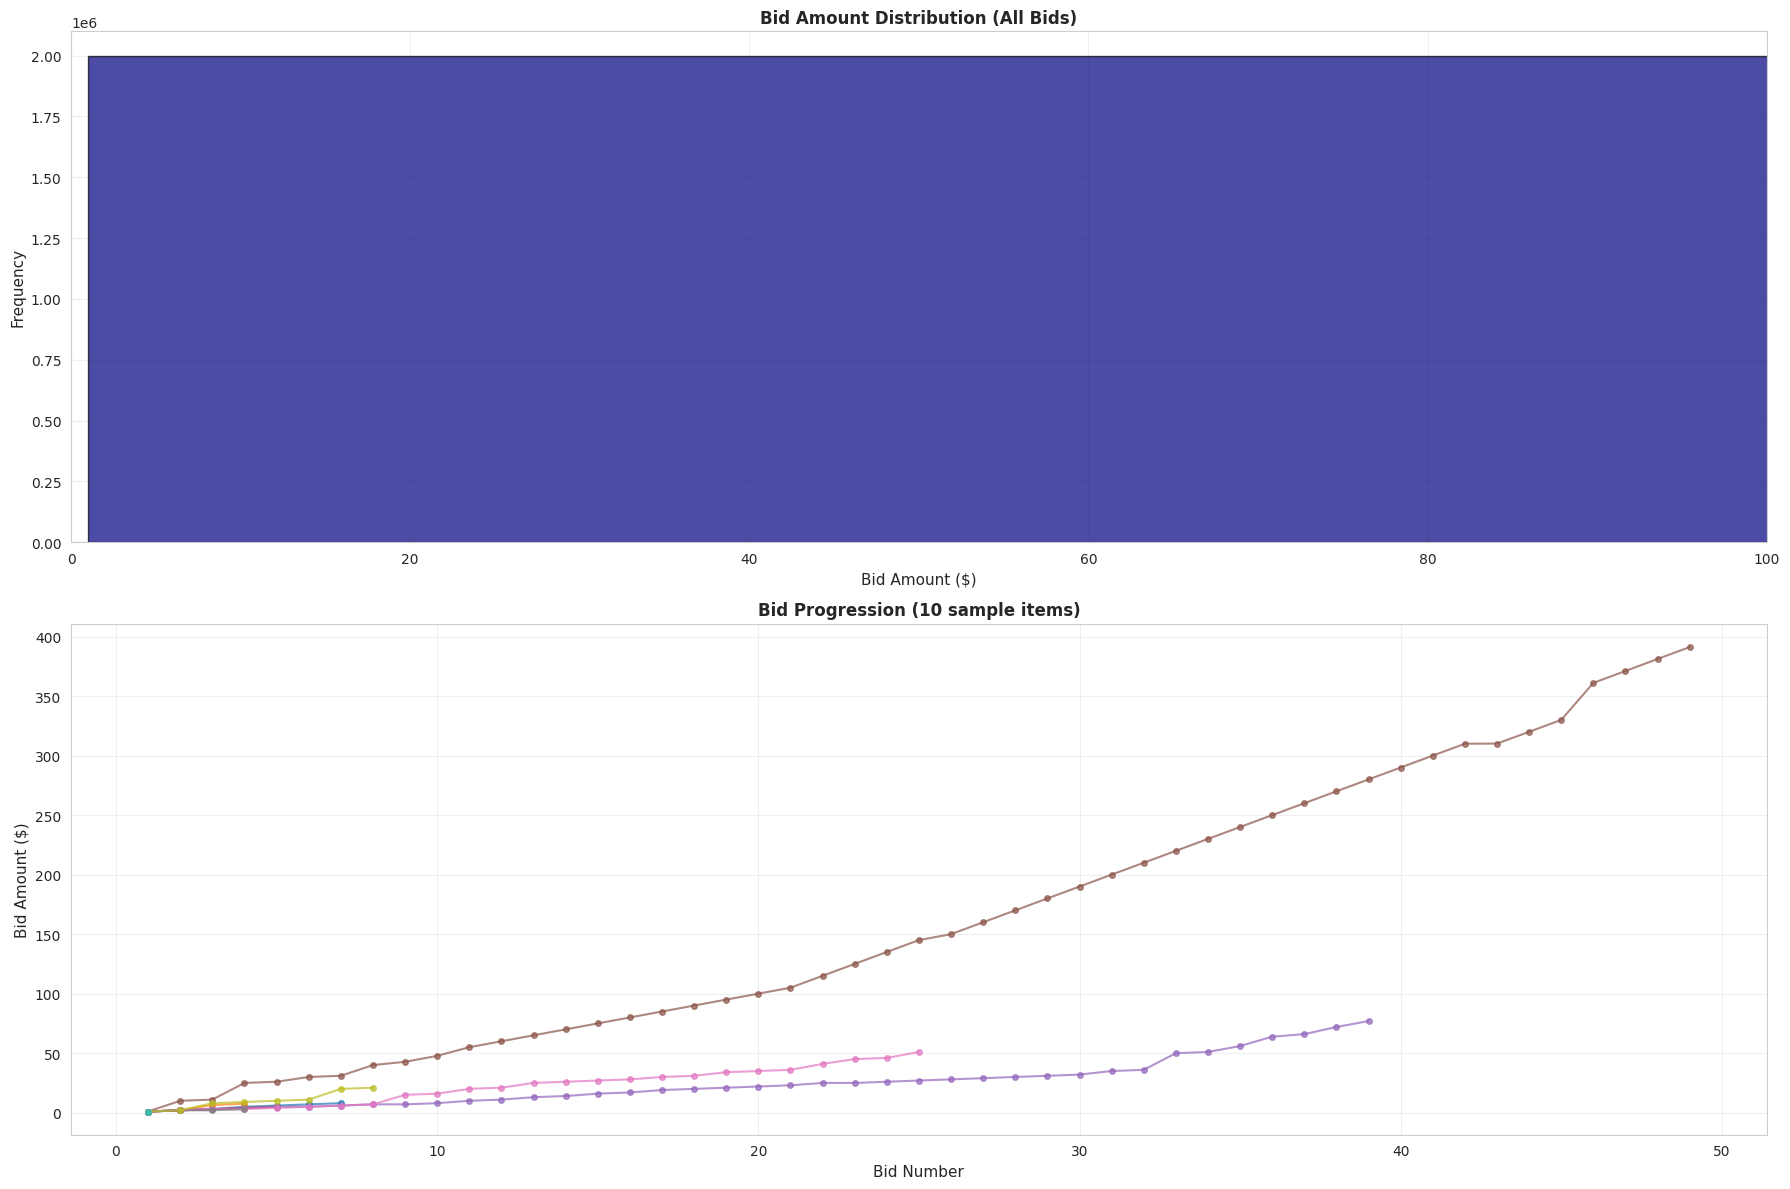

In [8]:
# Bid Amount Features Analysis
print("="*80)
print("BID AMOUNT FEATURES ANALYSIS")
print("="*80)

print(f"\nBid amount statistics:")
print(df['amount'].describe())

# Visualizations
fig, axes = plt.subplots(2, 1, figsize=(18, 12))

# 1. Bid amount distribution
axes[0].hist(df['amount'], bins=100, edgecolor='black', alpha=0.7, color='navy')
axes[0].set_xlabel('Bid Amount ($)', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title('Bid Amount Distribution (All Bids)', fontsize=12, fontweight='bold')
axes[0].set_xlim(0, 100)
axes[0].grid(True, alpha=0.3)

# 6. Bid progression (sample items)
sample_items = df['item_id'].unique()[:10]
for item_id in sample_items:
    item_data = df[df['item_id'] == item_id].sort_values('bid_number')
    axes[1].plot(item_data['bid_number'], item_data['amount'], 
                    marker='o', markersize=4, alpha=0.7, linewidth=1.5)
axes[1].set_xlabel('Bid Number', fontsize=11)
axes[1].set_ylabel('Bid Amount ($)', fontsize=11)
axes[1].set_title('Bid Progression (10 sample items)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


BID INCREMENT ANALYSIS

Bid increment statistics (excluding first bids):
count    1.812818e+06
mean     3.276124e+00
std      7.669712e+00
min      1.000000e-02
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      1.900000e+03
Name: bid_increment, dtype: float64

Increment distribution:
  $0-$1: 905,242
  $1-$5: 708,520
  $5-$10: 148,472
  $10-$20: 30,471
  $20+: 20,113


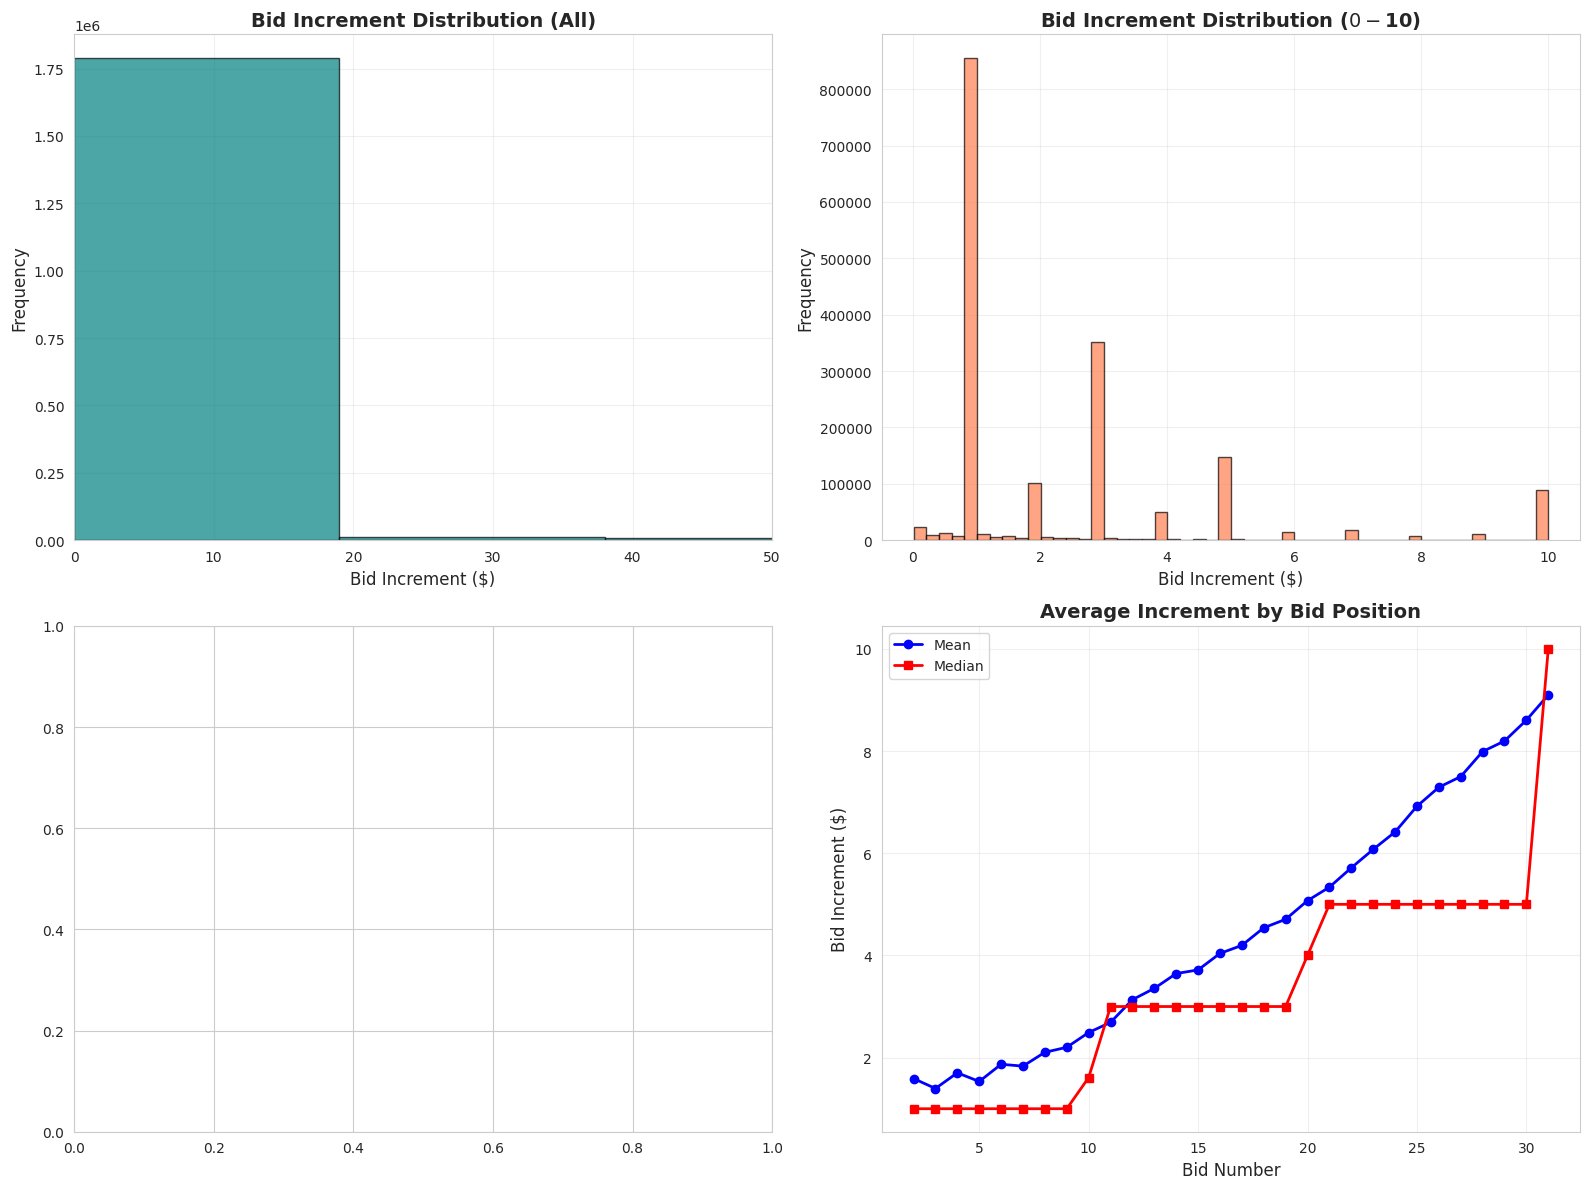

In [9]:
# Bid Increment Analysis
print("="*80)
print("BID INCREMENT ANALYSIS")
print("="*80)

# Filter out first bids (no increment)
increments = df[df['bid_increment'] > 0].copy()

print(f"\nBid increment statistics (excluding first bids):")
print(increments['bid_increment'].describe())

print(f"\nIncrement distribution:")
print(f"  $0-$1: {((increments['bid_increment'] > 0) & (increments['bid_increment'] <= 1)).sum():,}")
print(f"  $1-$5: {((increments['bid_increment'] > 1) & (increments['bid_increment'] <= 5)).sum():,}")
print(f"  $5-$10: {((increments['bid_increment'] > 5) & (increments['bid_increment'] <= 10)).sum():,}")
print(f"  $10-$20: {((increments['bid_increment'] > 10) & (increments['bid_increment'] <= 20)).sum():,}")
print(f"  $20+: {(increments['bid_increment'] > 20).sum():,}")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Increment distribution
axes[0, 0].hist(increments['bid_increment'], bins=100, edgecolor='black', alpha=0.7, color='teal')
axes[0, 0].set_xlabel('Bid Increment ($)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Bid Increment Distribution (All)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlim(0, 50)
axes[0, 0].grid(True, alpha=0.3)

# 2. Small increments detail
small_inc = increments[increments['bid_increment'] <= 10]
axes[0, 1].hist(small_inc['bid_increment'], bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[0, 1].set_xlabel('Bid Increment ($)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('Bid Increment Distribution ($0-$10)', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 4. Increment by bid position
# https://support.maxsold.com/hc/en-us/articles/203144054-How-do-bid-increments-work
inc_by_position = increments.groupby('bid_number')['bid_increment'].agg(['mean', 'median', 'count']).reset_index()
inc_by_position = inc_by_position[inc_by_position['count'] >= 50]  # Only if 50+ samples
axes[1, 1].plot(inc_by_position['bid_number'][:30], inc_by_position['mean'][:30], 
                marker='o', linewidth=2, label='Mean', color='blue')
axes[1, 1].plot(inc_by_position['bid_number'][:30], inc_by_position['median'][:30], 
                marker='s', linewidth=2, label='Median', color='red')
axes[1, 1].set_xlabel('Bid Number', fontsize=12)
axes[1, 1].set_ylabel('Bid Increment ($)', fontsize=12)
axes[1, 1].set_title('Average Increment by Bid Position', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

SEQUENCE AND POSITION ANALYSIS

Bid position statistics:
count    2.107247e+06
mean     5.498999e-01
std      2.925204e-01
min      6.369427e-03
25%      3.000000e-01
50%      5.476190e-01
75%      8.000000e-01
max      1.000000e+00
Name: bid_position_pct, dtype: float64
90th percentile: 0.99
95th percentile: 1.00
98th percentile: 1.00
99th percentile: 1.00


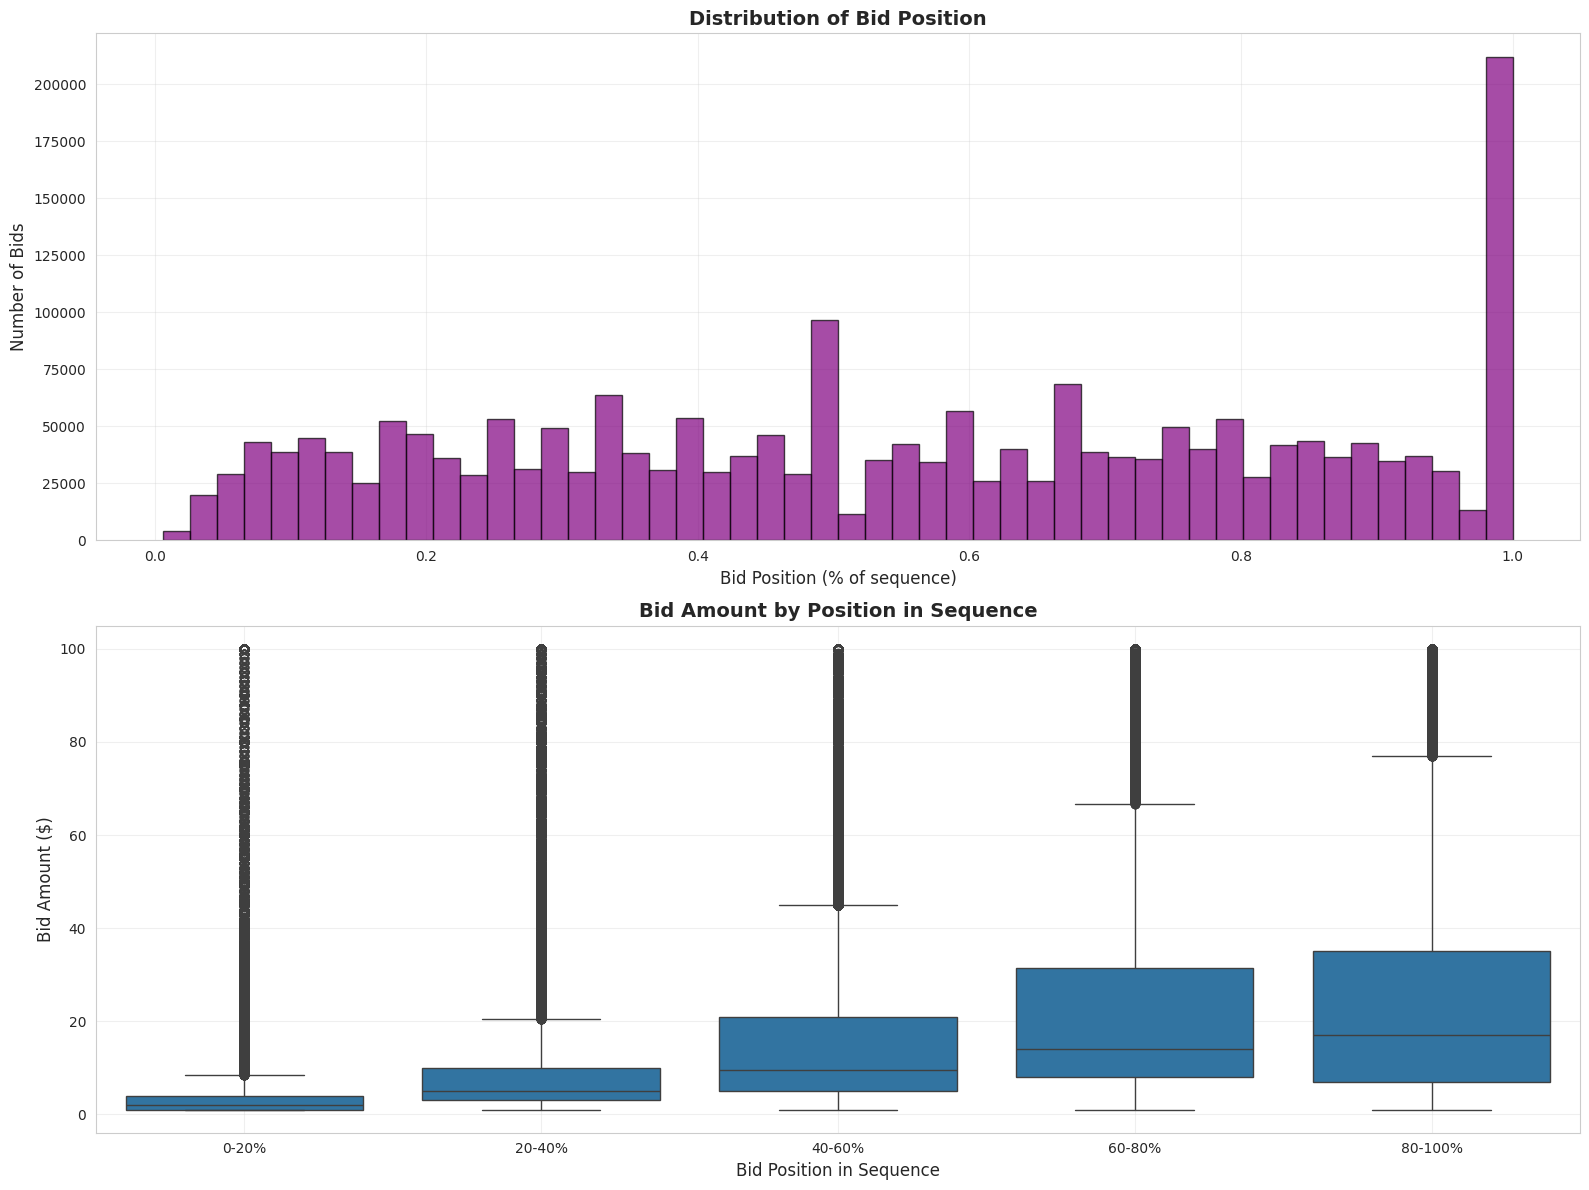

In [10]:
# Sequence and Position Analysis
print("="*80)
print("SEQUENCE AND POSITION ANALYSIS")
print("="*80)

print(f"\nBid position statistics:")
#describe bid_position_pct with 90 percentile, 95 percentile, 98 percentile and 99 percentile
print(df['bid_position_pct'].describe())
print(f"90th percentile: {df['bid_position_pct'].quantile(0.90):.2f}")
print(f"95th percentile: {df['bid_position_pct'].quantile(0.95):.2f}")
print(f"98th percentile: {df['bid_position_pct'].quantile(0.98):.2f}")
print(f"99th percentile: {df['bid_position_pct'].quantile(0.99):.2f}")



# Visualizations
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# 1. Bid position percentage distribution
axes[0].hist(df['bid_position_pct'], bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[0].set_xlabel('Bid Position (% of sequence)', fontsize=12)
axes[0].set_ylabel('Number of Bids', fontsize=12)
axes[0].set_title('Distribution of Bid Position', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# 4. Bid amount by position
position_bins = pd.cut(df['bid_position_pct'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0], 
                        labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])
df_temp = df[df['amount'] <= 100].copy()
df_temp['position_bin'] = pd.cut(df_temp['bid_position_pct'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0], 
                                  labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])
sns.boxplot(data=df_temp, x='position_bin', y='amount', ax=axes[1])
axes[1].set_xlabel('Bid Position in Sequence', fontsize=12)
axes[1].set_ylabel('Bid Amount ($)', fontsize=12)
axes[1].set_title('Bid Amount by Position in Sequence', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

FEATURE CORRELATION ANALYSIS


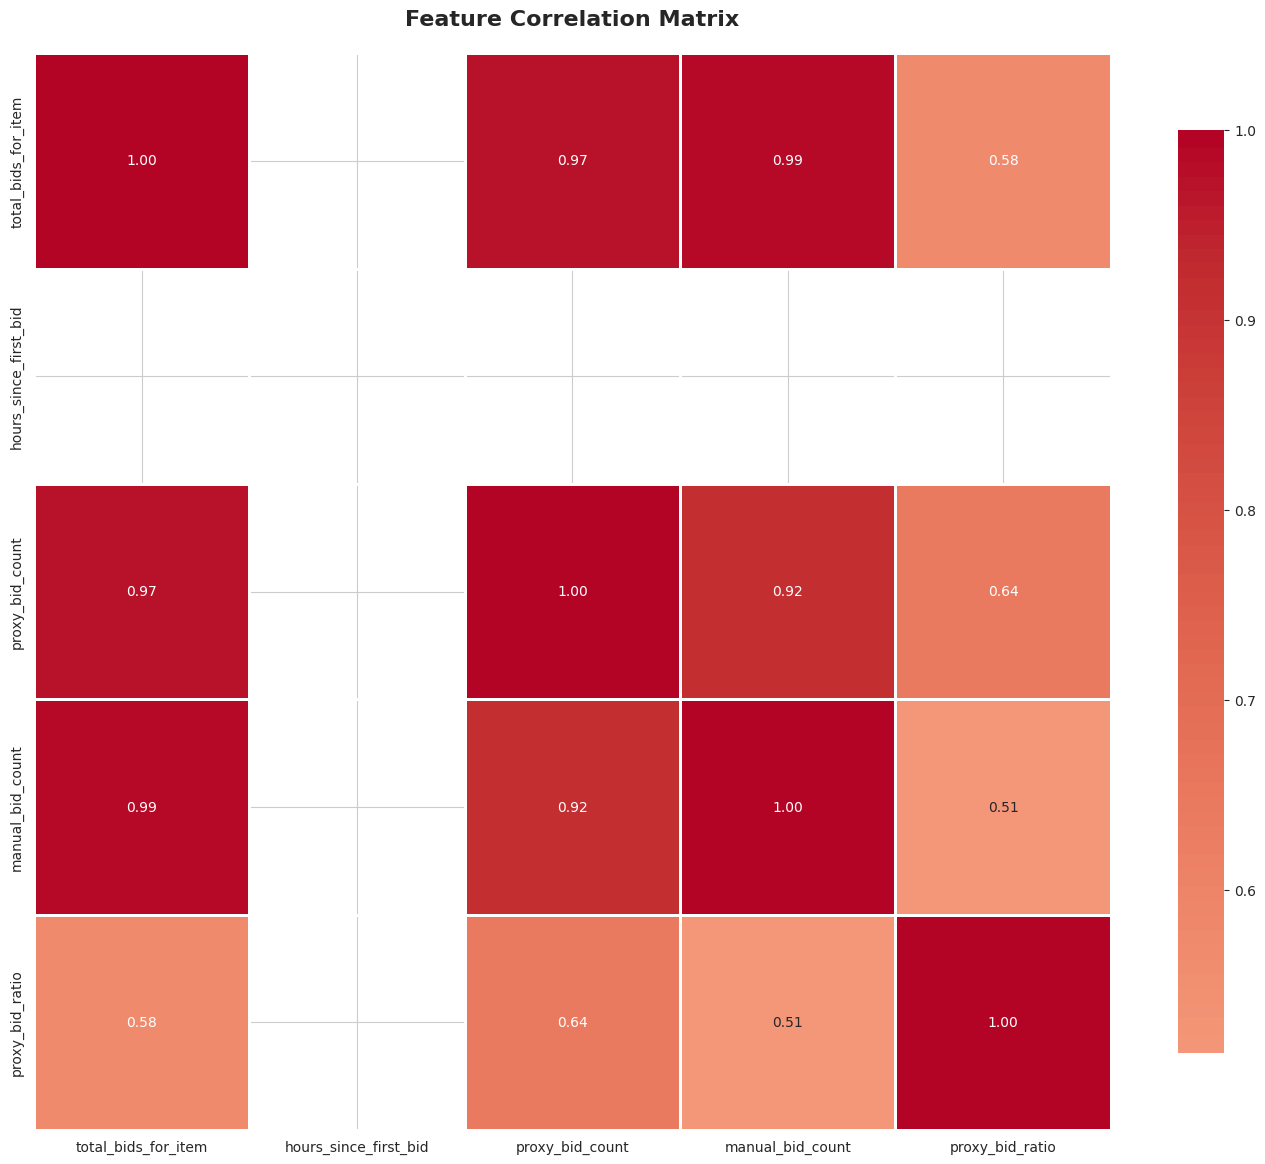

In [11]:
# Feature Correlation Matrix
print("="*80)
print("FEATURE CORRELATION ANALYSIS")
print("="*80)

# Select key numeric features for correlation analysis
correlation_features = [
    'total_bids_for_item',
    'hours_since_first_bid',
    'proxy_bid_count',
    'manual_bid_count',
    'proxy_bid_ratio',
]

# Get correlations (use item-level data to avoid duplication)
corr_matrix = item_level[correlation_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()



In [12]:
# Summary and Key Insights
print("="*80)
print("SUMMARY AND KEY INSIGHTS")
print("="*80)

print("\n1. BID NUMBER CORRECTION:")
print(f"   ✓ Successfully reversed bid numbers")
print(f"   ✓ First bids now have bid_number = 1")
print(f"   ✓ Last bids have bid_number = total_bids_for_item")

print("\n2. TOTAL BIDS FOR ITEM:")
print(f"   • Mean: {item_level['total_bids_for_item'].mean():.2f} bids per item")
print(f"   • Median: {item_level['total_bids_for_item'].median():.0f} bids per item")
print(f"   • {(item_level['total_bids_for_item'] >= 10).sum():,} items with 10+ bids (high competition)")

print("\n6. BID INCREMENTS:")
mean_inc = increments['bid_increment'].mean()
median_inc = increments['bid_increment'].median()
print(f"   • Mean increment: ${mean_inc:.2f}")
print(f"   • Median increment: ${median_inc:.2f}")
print(f"   • Most increments are small ($1-$5)")

print("\n" + "="*80)
print("ANALYSIS COMPLETE!")
print("="*80)

SUMMARY AND KEY INSIGHTS

1. BID NUMBER CORRECTION:
   ✓ Successfully reversed bid numbers
   ✓ First bids now have bid_number = 1
   ✓ Last bids have bid_number = total_bids_for_item

2. TOTAL BIDS FOR ITEM:
   • Mean: 10.02 bids per item
   • Median: 8 bids per item
   • 88,015 items with 10+ bids (high competition)

6. BID INCREMENTS:
   • Mean increment: $3.28
   • Median increment: $1.00
   • Most increments are small ($1-$5)

ANALYSIS COMPLETE!


BID PROGRESSION OVER TIME

Showing bid progression for 20 sample items
X-axis: Hours since first bid
Y-axis: Bid amount ($)


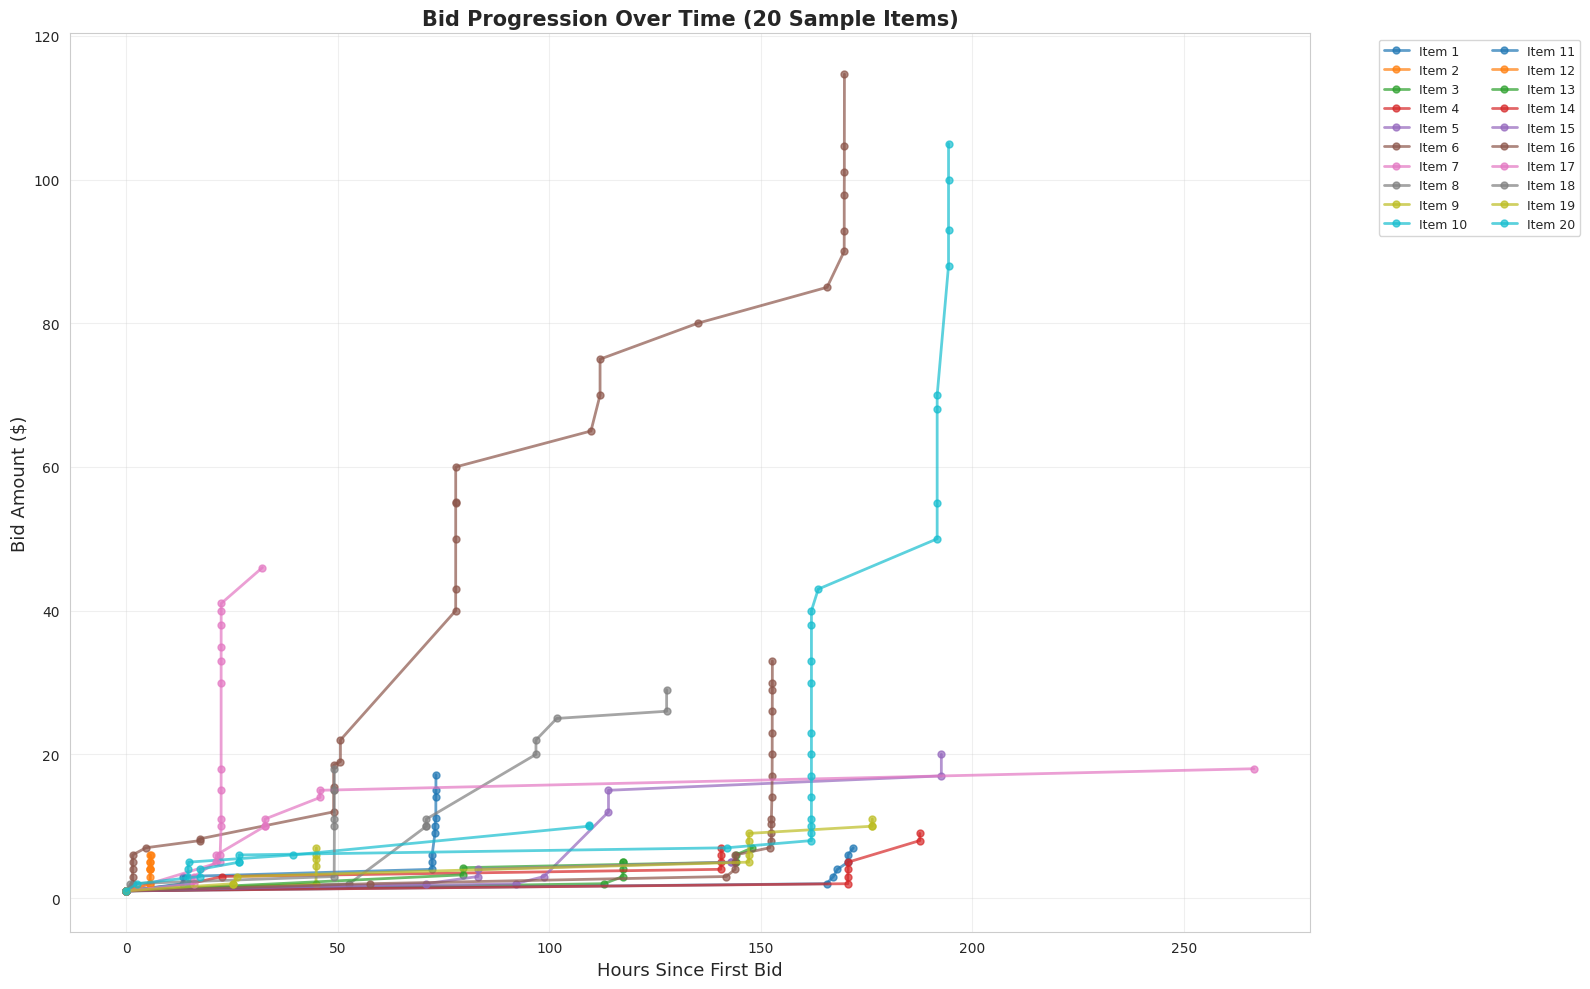


Statistics for sampled items:
       total_bids  min_bid     max_bid
count    20.00000     20.0   20.000000
mean     10.85000      1.0   24.045500
std       7.54129      0.0   31.303921
min       5.00000      1.0    5.000000
25%       6.75000      1.0    7.000000
50%       7.00000      1.0   10.550000
75%      11.25000      1.0   22.250000
max      32.00000      1.0  114.660000


In [13]:
# Bid Progression Over Time (Hours Since First Bid)
print("="*80)
print("BID PROGRESSION OVER TIME")
print("="*80)

# Sample 20 items with at least 5 bids for better visualization
items_with_bids = df.groupby('item_id').size()
eligible_items = items_with_bids[items_with_bids >= 5].index
sample_items = np.random.choice(eligible_items, size=min(20, len(eligible_items)), replace=False)

print(f"\nShowing bid progression for {len(sample_items)} sample items")
print(f"X-axis: Hours since first bid")
print(f"Y-axis: Bid amount ($)")

# Create plot
plt.figure(figsize=(16, 10))

for i, item_id in enumerate(sample_items):
    item_data = df[df['item_id'] == item_id].sort_values('hours_since_first_bid')
    plt.plot(item_data['hours_since_first_bid'], item_data['amount'], 
             marker='o', markersize=5, alpha=0.7, linewidth=2, label=f'Item {i+1}')

plt.xlabel('Hours Since First Bid', fontsize=13)
plt.ylabel('Bid Amount ($)', fontsize=13)
plt.title('Bid Progression Over Time (20 Sample Items)', fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9, ncol=2)
plt.tight_layout()
plt.show()

# Show statistics for these items
print(f"\nStatistics for sampled items:")
sample_data = df[df['item_id'].isin(sample_items)].groupby('item_id').agg({
    'total_bids_for_item': 'first',
    'amount': ['min', 'max']
})
sample_data.columns = ['total_bids', 'min_bid', 'max_bid']
print(sample_data.describe())

In [26]:
# Bid Clustering Analysis - Time-based Bid Grouping
print("="*80)
print("BID CLUSTERING BY TIME - BURST ANALYSIS")
print("="*80)

print("\nAnalyzing how bids cluster in quick succession followed by waiting periods...")
print("Testing different time thresholds for grouping consecutive bids")

# Function to collapse bids within time threshold for an item
def collapse_bids_by_time(item_bids, time_threshold_minutes):
    """
    Group consecutive bids that occur within time_threshold_minutes of each other.
    Returns the number of bid groups after collapsing.
    """
    if len(item_bids) <= 1:
        return len(item_bids)
    
    # Sort by time
    item_bids = item_bids.sort_values('hours_since_first_bid')
    
    # Convert threshold to hours
    threshold_hours = time_threshold_minutes / 60.0
    
    # Group consecutive bids
    groups = 1
    last_bid_time = item_bids.iloc[0]['hours_since_first_bid']
    
    for _, bid in item_bids.iloc[1:].iterrows():
        time_diff = bid['hours_since_first_bid'] - last_bid_time
        
        if time_diff > threshold_hours:
            # New group - time gap exceeded threshold
            groups += 1
        
        last_bid_time = bid['hours_since_first_bid']
    
    return groups

# Test different time thresholds
time_thresholds = [0.5/15, 0.25, 1, 5, 15, 60]  # minutes
threshold_labels = ['2s', '15s', '1m', '5m', '15m', '1h']

print(f"\nTesting {len(time_thresholds)} different time thresholds...")
print(f"Thresholds: {threshold_labels}")

# Sample items for faster computation (or use all if dataset is manageable)
sample_items = df['item_id'].unique()[:1000]  # Adjust sample size as needed
print(f"\nUsing {len(sample_items):,} sample items for analysis")

results = []

for threshold_mins in time_thresholds:
    total_original_bids = 0
    total_collapsed_groups = 0
    
    for item_id in sample_items:
        item_bids = df[df['item_id'] == item_id]
        
        if len(item_bids) > 1:  # Only analyze items with multiple bids
            original_count = len(item_bids)
            collapsed_count = collapse_bids_by_time(item_bids, threshold_mins)
            
            total_original_bids += original_count
            total_collapsed_groups += collapsed_count
    
    compression_ratio = total_original_bids / total_collapsed_groups if total_collapsed_groups > 0 else 1
    reduction_pct = 100 * (1 - total_collapsed_groups / total_original_bids) if total_original_bids > 0 else 0
    
    results.append({
        'threshold_mins': threshold_mins,
        'threshold_label': threshold_labels[time_thresholds.index(threshold_mins)],
        'original_bids': total_original_bids,
        'collapsed_groups': total_collapsed_groups,
        'compression_ratio': compression_ratio,
        'reduction_pct': reduction_pct
    })
    
    print(f"  {threshold_labels[time_thresholds.index(threshold_mins)]:>5s}: {total_collapsed_groups:,} groups (from {total_original_bids:,} bids) - {compression_ratio:.2f}x compression, {reduction_pct:.1f}% reduction")

results_df = pd.DataFrame(results)

print("\n" + "="*80)
print("RESULTS SUMMARY")
print("="*80)
print(results_df.to_string(index=False))

BID CLUSTERING BY TIME - BURST ANALYSIS

Analyzing how bids cluster in quick succession followed by waiting periods...
Testing different time thresholds for grouping consecutive bids

Testing 6 different time thresholds...
Thresholds: ['2s', '15s', '1m', '5m', '15m', '1h']

Using 1,000 sample items for analysis
     2s: 7,544 groups (from 11,437 bids) - 1.52x compression, 34.0% reduction
    15s: 6,510 groups (from 11,437 bids) - 1.76x compression, 43.1% reduction
     1m: 5,845 groups (from 11,437 bids) - 1.96x compression, 48.9% reduction
     5m: 5,340 groups (from 11,437 bids) - 2.14x compression, 53.3% reduction
    15m: 5,032 groups (from 11,437 bids) - 2.27x compression, 56.0% reduction
     1h: 4,559 groups (from 11,437 bids) - 2.51x compression, 60.1% reduction

RESULTS SUMMARY
 threshold_mins threshold_label  original_bids  collapsed_groups  compression_ratio  reduction_pct
       0.033333              2s          11437              7544           1.516039      34.038646
    

VISUALIZATION - COMPRESSION BY TIME THRESHOLD


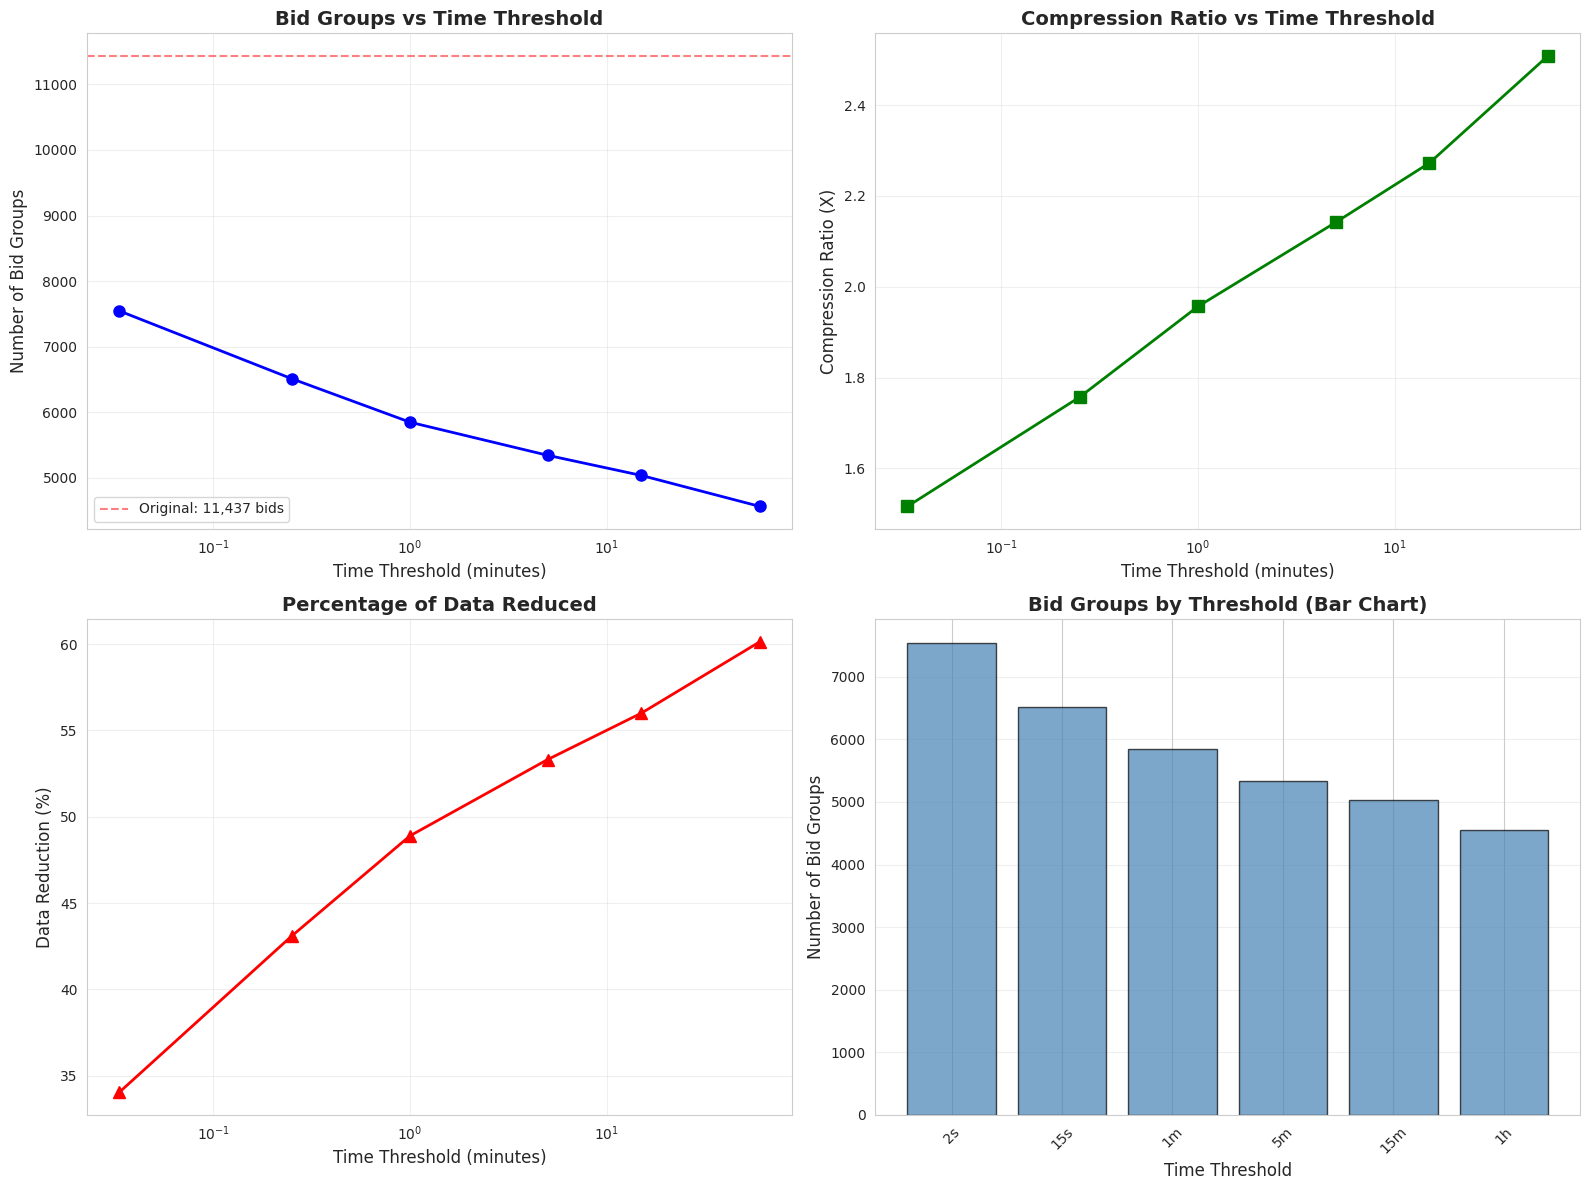


FINDING OPTIMAL THRESHOLD

Rate of change in compression ratio:
    15s: +0.241 (15.9% increase)
     1m: +0.200 (11.4% increase)
     5m: +0.185 (9.5% increase)
    15m: +0.131 (6.1% increase)
     1h: +0.236 (10.4% increase)

No clear elbow point found - compression continues to improve significantly


In [27]:
# Visualize Compression Results
print("="*80)
print("VISUALIZATION - COMPRESSION BY TIME THRESHOLD")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Collapsed groups vs time threshold
axes[0, 0].plot(results_df['threshold_mins'], results_df['collapsed_groups'], 
                marker='o', linewidth=2, markersize=8, color='blue')
axes[0, 0].set_xlabel('Time Threshold (minutes)', fontsize=12)
axes[0, 0].set_ylabel('Number of Bid Groups', fontsize=12)
axes[0, 0].set_title('Bid Groups vs Time Threshold', fontsize=14, fontweight='bold')
axes[0, 0].set_xscale('log')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axhline(y=results_df['original_bids'].iloc[0], color='red', linestyle='--', 
                   alpha=0.5, label=f'Original: {results_df["original_bids"].iloc[0]:,} bids')
axes[0, 0].legend()

# 2. Compression ratio vs time threshold
axes[0, 1].plot(results_df['threshold_mins'], results_df['compression_ratio'], 
                marker='s', linewidth=2, markersize=8, color='green')
axes[0, 1].set_xlabel('Time Threshold (minutes)', fontsize=12)
axes[0, 1].set_ylabel('Compression Ratio (X)', fontsize=12)
axes[0, 1].set_title('Compression Ratio vs Time Threshold', fontsize=14, fontweight='bold')
axes[0, 1].set_xscale('log')
axes[0, 1].grid(True, alpha=0.3)

# 3. Reduction percentage
axes[1, 0].plot(results_df['threshold_mins'], results_df['reduction_pct'], 
                marker='^', linewidth=2, markersize=8, color='red')
axes[1, 0].set_xlabel('Time Threshold (minutes)', fontsize=12)
axes[1, 0].set_ylabel('Data Reduction (%)', fontsize=12)
axes[1, 0].set_title('Percentage of Data Reduced', fontsize=14, fontweight='bold')
axes[1, 0].set_xscale('log')
axes[1, 0].grid(True, alpha=0.3)

# 4. Bar chart for easier threshold comparison
axes[1, 1].bar(range(len(results_df)), results_df['collapsed_groups'], 
               color='steelblue', alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Time Threshold', fontsize=12)
axes[1, 1].set_ylabel('Number of Bid Groups', fontsize=12)
axes[1, 1].set_title('Bid Groups by Threshold (Bar Chart)', fontsize=14, fontweight='bold')
axes[1, 1].set_xticks(range(len(results_df)))
axes[1, 1].set_xticklabels(results_df['threshold_label'], rotation=45)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Find optimal threshold (elbow point)
print("\n" + "="*80)
print("FINDING OPTIMAL THRESHOLD")
print("="*80)

# Calculate rate of change in compression ratio
results_df['ratio_change'] = results_df['compression_ratio'].diff()
results_df['ratio_change_pct'] = results_df['ratio_change'] / results_df['compression_ratio'].shift(1) * 100

print("\nRate of change in compression ratio:")
for _, row in results_df.iterrows():
    if pd.notna(row['ratio_change']):
        print(f"  {row['threshold_label']:>5s}: +{row['ratio_change']:.3f} ({row['ratio_change_pct']:.1f}% increase)")

# Find "elbow" - where marginal benefit diminishes
significant_change_threshold = 5  # Less than 5% improvement
elbow_idx = None
for i in range(1, len(results_df)):
    if results_df.iloc[i]['ratio_change_pct'] < significant_change_threshold:
        elbow_idx = i
        break

if elbow_idx:
    optimal = results_df.iloc[elbow_idx]
    print(f"\n*** OPTIMAL THRESHOLD SUGGESTION: {optimal['threshold_label']} ***")
    print(f"    Compression ratio: {optimal['compression_ratio']:.2f}x")
    print(f"    Reduction: {optimal['reduction_pct']:.1f}%")
    print(f"    Bid groups: {optimal['collapsed_groups']:,} (from {optimal['original_bids']:,} bids)")
else:
    print("\nNo clear elbow point found - compression continues to improve significantly")

In [25]:
# Detailed Analysis of Bid Bursts - Example Items
print("="*80)
print("DETAILED BID BURST ANALYSIS - SAMPLE ITEMS")
print("="*80)

# Use a moderate threshold (e.g., 10 minutes) to identify bursts
burst_threshold_mins = 10
burst_threshold_hours = burst_threshold_mins / 60.0

print(f"\nUsing {burst_threshold_mins}-minute threshold to identify bid bursts")
print(f"(Bids within {burst_threshold_mins} minutes are considered part of the same burst)\n")

# Analyze a few items in detail
sample_items_detailed = df['item_id'].unique()[:40]

burst_stats = []

for item_id in sample_items_detailed:
    item_bids = df[df['item_id'] == item_id].sort_values('hours_since_first_bid').copy()
    
    if len(item_bids) < 2:
        continue
    
    # Identify burst groups
    item_bids['time_diff'] = item_bids['hours_since_first_bid'].diff()
    item_bids['burst_group'] = (item_bids['time_diff'] > burst_threshold_hours).cumsum()
    
    # Analyze each burst
    burst_groups = item_bids.groupby('burst_group').agg({
        'hours_since_first_bid': ['min', 'max', 'count'],
        'amount': ['min', 'max', 'mean']
    }).reset_index()
    
    burst_groups.columns = ['burst_group', 'start_time', 'end_time', 'num_bids', 
                            'min_amount', 'max_amount', 'avg_amount']
    burst_groups['duration_mins'] = (burst_groups['end_time'] - burst_groups['start_time']) * 60
    
    # Calculate waiting time between bursts
    burst_groups['wait_to_next_burst_mins'] = burst_groups['start_time'].shift(-1) - burst_groups['end_time']
    burst_groups['wait_to_next_burst_mins'] *= 60  # Convert to minutes
    
    print(f"\nItem {item_id}:")
    print(f"  Total bids: {len(item_bids)}")
    print(f"  Number of bursts: {len(burst_groups)}")
    print(f"  Average bids per burst: {burst_groups['num_bids'].mean():.2f}")
    print(f"  Average burst duration: {burst_groups['duration_mins'].mean():.2f} minutes")
    
    if burst_groups['wait_to_next_burst_mins'].notna().sum() > 0:
        print(f"  Average waiting time between bursts: {burst_groups['wait_to_next_burst_mins'].mean():.2f} minutes")
    
    # Store stats
    for _, burst in burst_groups.iterrows():
        burst_stats.append({
            'item_id': item_id,
            'burst_group': burst['burst_group'],
            'num_bids': burst['num_bids'],
            'duration_mins': burst['duration_mins'],
            'wait_to_next_mins': burst['wait_to_next_burst_mins'],
            'start_time_hours': burst['start_time'],
            'end_time_hours': burst['end_time']
        })
    
    # Show burst details
    print(f"\n  Burst details:")
    for _, burst in burst_groups.head(5).iterrows():  # Show first 5 bursts
        print(f"    Burst {int(burst['burst_group'])}: {int(burst['num_bids'])} bids in {burst['duration_mins']:.1f} mins " +
              f"(${burst['min_amount']:.2f} → ${burst['max_amount']:.2f})" +
              (f", wait {burst['wait_to_next_burst_mins']:.1f} mins" if pd.notna(burst['wait_to_next_burst_mins']) else ""))

burst_stats_df = pd.DataFrame(burst_stats)

print("\n" + "="*80)
print("BURST STATISTICS SUMMARY")
print("="*80)
print(f"\nTotal bursts analyzed: {len(burst_stats_df)}")
print(f"\nBids per burst:")
print(burst_stats_df['num_bids'].describe())
print(f"\nBurst duration (minutes):")
print(burst_stats_df['duration_mins'].describe())
print(f"\nWaiting time between bursts (minutes):")
print(burst_stats_df['wait_to_next_mins'].describe())

DETAILED BID BURST ANALYSIS - SAMPLE ITEMS

Using 10-minute threshold to identify bid bursts
(Bids within 10 minutes are considered part of the same burst)


Item 3430422:
  Total bids: 7
  Number of bursts: 4
  Average bids per burst: 1.75
  Average burst duration: 0.07 minutes
  Average waiting time between bursts: 367.04 minutes

  Burst details:
    Burst 0: 1 bids in 0.0 mins ($1.00 → $1.00), wait 326.8 mins
    Burst 1: 1 bids in 0.0 mins ($2.00 → $2.00), wait 30.0 mins
    Burst 2: 1 bids in 0.0 mins ($3.00 → $3.00), wait 744.2 mins
    Burst 3: 4 bids in 0.3 mins ($5.00 → $8.00)

Item 3430423:
  Total bids: 4
  Number of bursts: 3
  Average bids per burst: 1.33
  Average burst duration: 0.00 minutes
  Average waiting time between bursts: 4260.68 minutes

  Burst details:
    Burst 0: 1 bids in 0.0 mins ($1.00 → $1.00), wait 8096.5 mins
    Burst 1: 1 bids in 0.0 mins ($2.00 → $2.00), wait 424.9 mins
    Burst 2: 2 bids in 0.0 mins ($6.50 → $7.50)

Item 3430424:
  Total bids: 2


BID BURST PATTERN VISUALIZATION


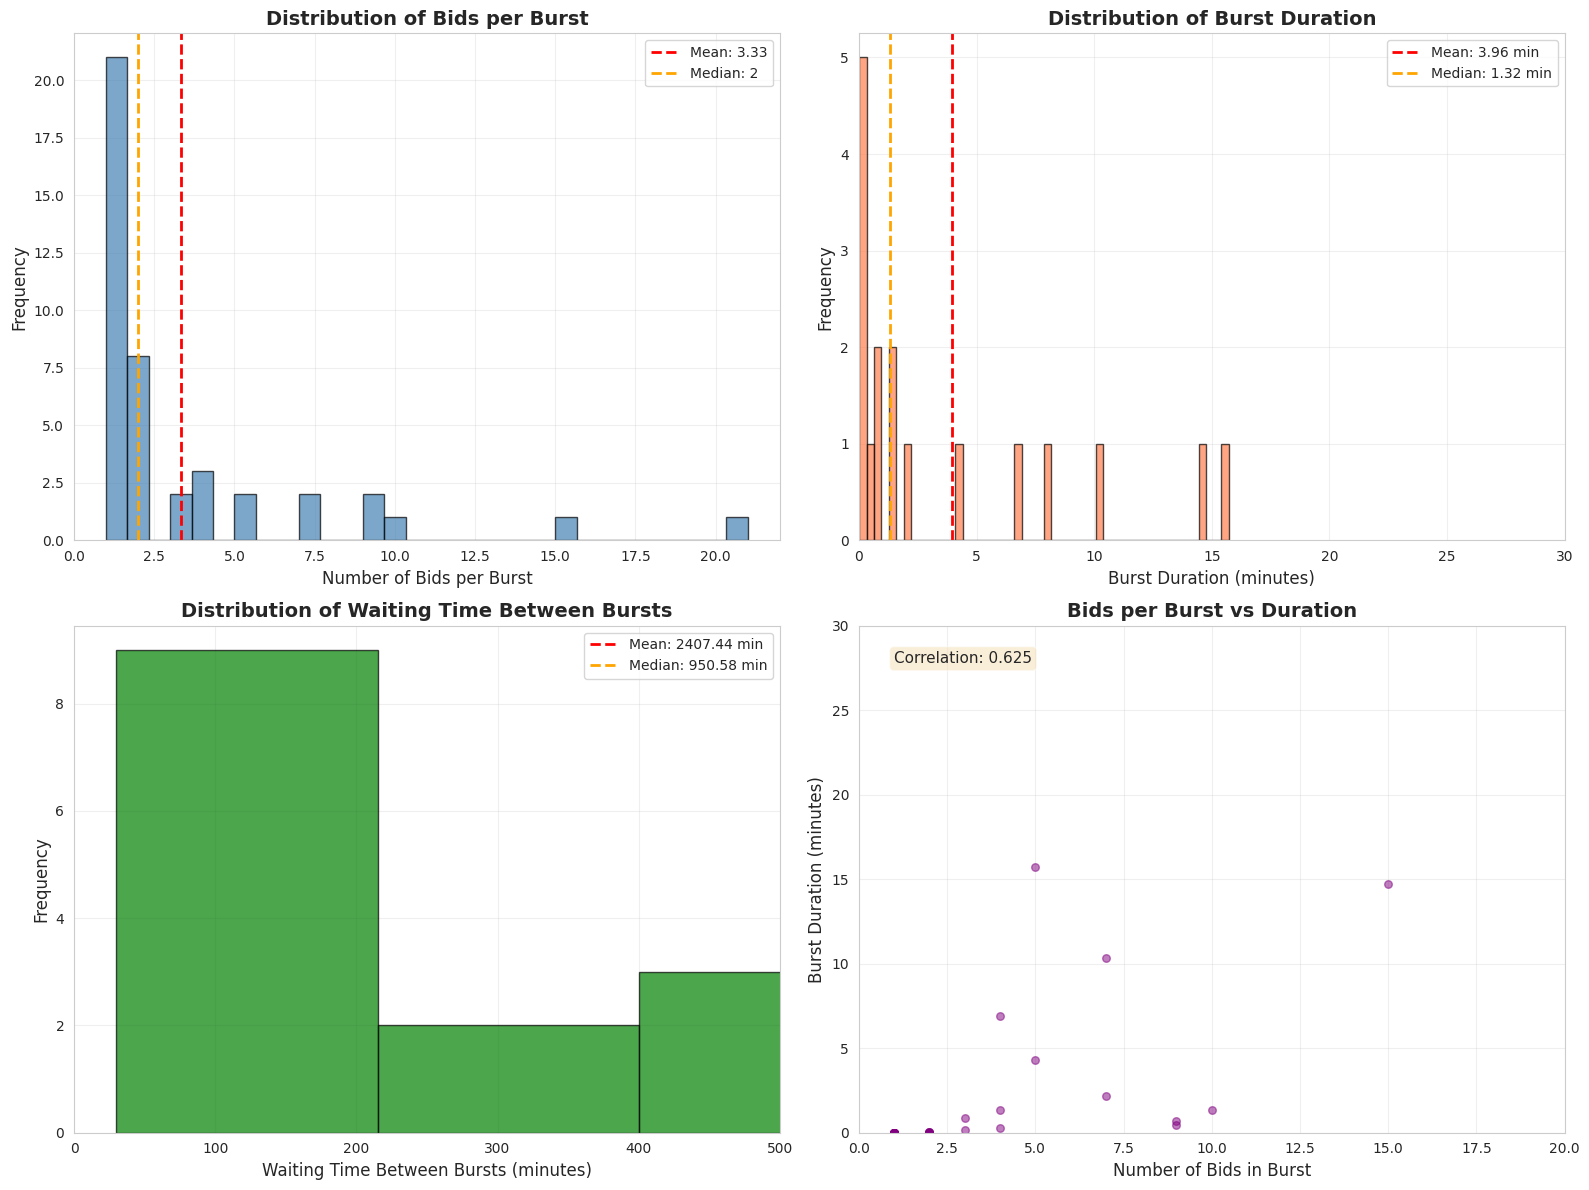


Key findings:
  • Average burst contains 3.33 bids
  • Typical burst duration: 1.32 minutes
  • Typical waiting time between bursts: 950.58 minutes
  • Correlation between burst size and duration: 0.625


In [20]:
# Visualize Burst Patterns
print("="*80)
print("BID BURST PATTERN VISUALIZATION")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribution of bids per burst
axes[0, 0].hist(burst_stats_df['num_bids'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].axvline(burst_stats_df['num_bids'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {burst_stats_df["num_bids"].mean():.2f}')
axes[0, 0].axvline(burst_stats_df['num_bids'].median(), color='orange', linestyle='--', 
                   linewidth=2, label=f'Median: {burst_stats_df["num_bids"].median():.0f}')
axes[0, 0].set_xlabel('Number of Bids per Burst', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Distribution of Bids per Burst', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Distribution of burst duration
valid_durations = burst_stats_df[burst_stats_df['duration_mins'] > 0]
axes[0, 1].hist(valid_durations['duration_mins'], bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[0, 1].axvline(valid_durations['duration_mins'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {valid_durations["duration_mins"].mean():.2f} min')
axes[0, 1].axvline(valid_durations['duration_mins'].median(), color='orange', linestyle='--', 
                   linewidth=2, label=f'Median: {valid_durations["duration_mins"].median():.2f} min')
axes[0, 1].set_xlabel('Burst Duration (minutes)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('Distribution of Burst Duration', fontsize=14, fontweight='bold')
axes[0, 1].set_xlim(0, 30)  # Focus on first 30 minutes
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Waiting time between bursts
valid_waits = burst_stats_df[burst_stats_df['wait_to_next_mins'].notna() & 
                              (burst_stats_df['wait_to_next_mins'] > 0)]
axes[1, 0].hist(valid_waits['wait_to_next_mins'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].axvline(valid_waits['wait_to_next_mins'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {valid_waits["wait_to_next_mins"].mean():.2f} min')
axes[1, 0].axvline(valid_waits['wait_to_next_mins'].median(), color='orange', linestyle='--', 
                   linewidth=2, label=f'Median: {valid_waits["wait_to_next_mins"].median():.2f} min')
axes[1, 0].set_xlabel('Waiting Time Between Bursts (minutes)', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Distribution of Waiting Time Between Bursts', fontsize=14, fontweight='bold')
axes[1, 0].set_xlim(0, 500)  # Cap for better visualization
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Relationship: bids per burst vs burst duration
axes[1, 1].scatter(burst_stats_df['num_bids'], burst_stats_df['duration_mins'], 
                   alpha=0.5, s=30, color='purple')
axes[1, 1].set_xlabel('Number of Bids in Burst', fontsize=12)
axes[1, 1].set_ylabel('Burst Duration (minutes)', fontsize=12)
axes[1, 1].set_title('Bids per Burst vs Duration', fontsize=14, fontweight='bold')
axes[1, 1].set_xlim(0, 20)
axes[1, 1].set_ylim(0, 30)
axes[1, 1].grid(True, alpha=0.3)

# Add correlation
corr = burst_stats_df[['num_bids', 'duration_mins']].corr().iloc[0, 1]
axes[1, 1].text(0.05, 0.95, f'Correlation: {corr:.3f}', 
                transform=axes[1, 1].transAxes, 
                fontsize=11, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\nKey findings:")
print(f"  • Average burst contains {burst_stats_df['num_bids'].mean():.2f} bids")
print(f"  • Typical burst duration: {valid_durations['duration_mins'].median():.2f} minutes")
print(f"  • Typical waiting time between bursts: {valid_waits['wait_to_next_mins'].median():.2f} minutes")
print(f"  • Correlation between burst size and duration: {corr:.3f}")

VISUAL EXAMPLE - BID TIMELINE WITH BURST GROUPS


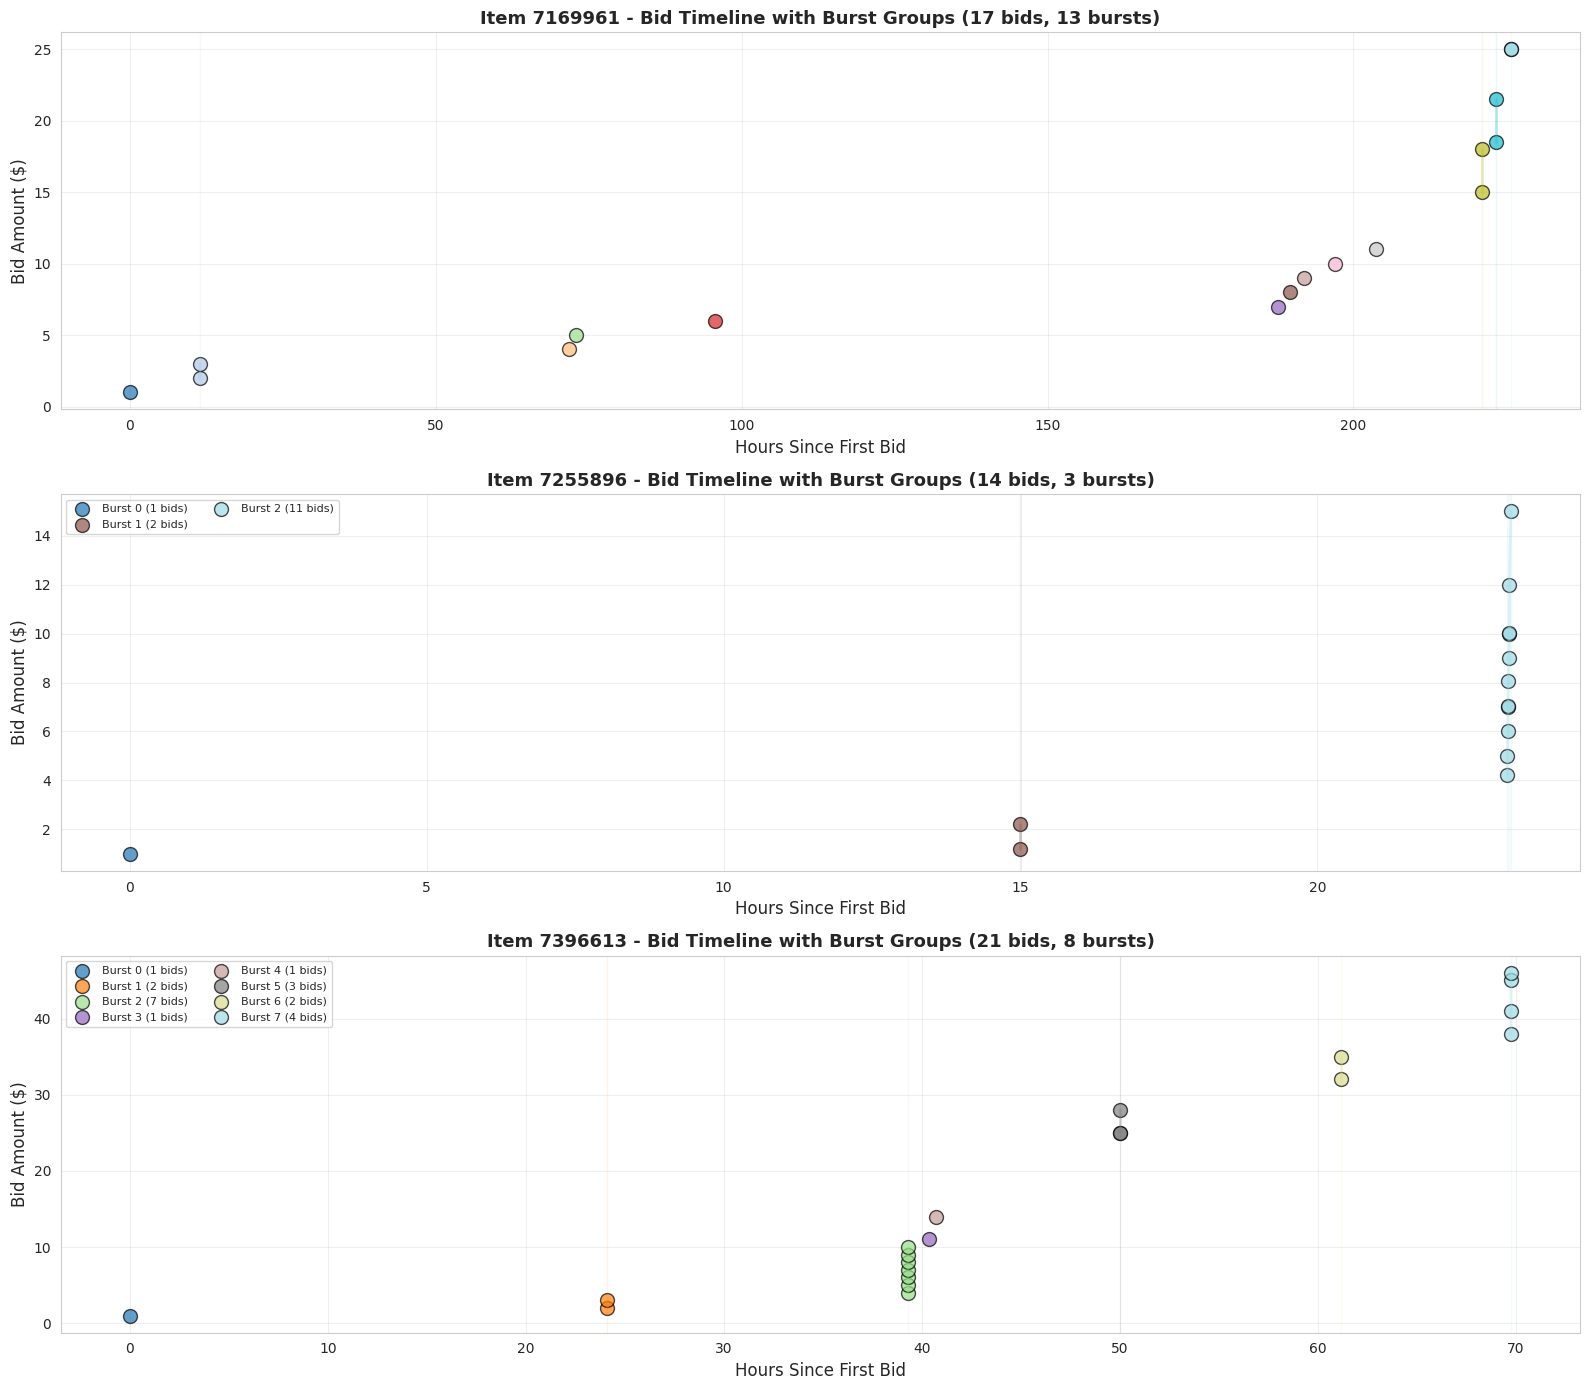


These timelines show:
  • Each color represents a different burst group
  • Bursts are clusters of bids within 10 minutes of each other
  • Shaded regions highlight the duration of each burst
  • Notice the gaps between bursts (waiting periods)


In [21]:
# Visual Example: Bid Timeline with Bursts Highlighted
print("="*80)
print("VISUAL EXAMPLE - BID TIMELINE WITH BURST GROUPS")
print("="*80)

# Pick 3 items with good bidding activity for visualization
items_with_multiple_bids = df.groupby('item_id').size()
items_with_multiple_bids = items_with_multiple_bids[items_with_multiple_bids >= 10].sample(3, random_state=42)

fig, axes = plt.subplots(3, 1, figsize=(16, 14))

for idx, (item_id, bid_count) in enumerate(items_with_multiple_bids.items()):
    item_bids = df[df['item_id'] == item_id].sort_values('hours_since_first_bid').copy()
    
    # Identify bursts using 10-minute threshold
    item_bids['time_diff'] = item_bids['hours_since_first_bid'].diff()
    item_bids['burst_group'] = (item_bids['time_diff'] > burst_threshold_hours).cumsum()
    
    # Plot bids over time
    ax = axes[idx]
    
    # Color each burst differently
    colors = plt.cm.tab20(np.linspace(0, 1, item_bids['burst_group'].nunique()))
    
    for burst_id in item_bids['burst_group'].unique():
        burst_bids = item_bids[item_bids['burst_group'] == burst_id]
        color = colors[int(burst_id % len(colors))]
        
        # Plot bids in this burst
        ax.scatter(burst_bids['hours_since_first_bid'], burst_bids['amount'], 
                  s=100, alpha=0.7, color=color, edgecolors='black', linewidth=1,
                  label=f'Burst {int(burst_id)} ({len(burst_bids)} bids)')
        
        # Connect bids in same burst
        ax.plot(burst_bids['hours_since_first_bid'], burst_bids['amount'], 
               color=color, alpha=0.3, linewidth=2)
        
        # Highlight burst region
        if len(burst_bids) > 1:
            ax.axvspan(burst_bids['hours_since_first_bid'].min(), 
                      burst_bids['hours_since_first_bid'].max(),
                      alpha=0.1, color=color)
    
    ax.set_xlabel('Hours Since First Bid', fontsize=12)
    ax.set_ylabel('Bid Amount ($)', fontsize=12)
    ax.set_title(f'Item {item_id} - Bid Timeline with Burst Groups ({int(bid_count)} bids, {item_bids["burst_group"].nunique()} bursts)',
                fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Only show legend if not too many bursts
    if item_bids['burst_group'].nunique() <= 8:
        ax.legend(loc='best', fontsize=8, ncol=2)

plt.tight_layout()
plt.show()

print("\nThese timelines show:")
print("  • Each color represents a different burst group")
print("  • Bursts are clusters of bids within 10 minutes of each other")
print("  • Shaded regions highlight the duration of each burst")
print("  • Notice the gaps between bursts (waiting periods)")

In [23]:
# Summary and Insights
print("="*80)
print("BID BURST ANALYSIS - SUMMARY AND INSIGHTS")
print("="*80)

print("\n1. DATA COMPRESSION BY TIME THRESHOLD:")
print("-" * 80)
print(f"   Original bids: {results_df['original_bids'].iloc[0]:,}")
print(f"\n   Compression results by threshold:")
for _, row in results_df.iterrows():
    print(f"     {row['threshold_label']:>5s}: {row['collapsed_groups']:,} groups " +
          f"({row['compression_ratio']:.2f}x compression, {row['reduction_pct']:.1f}% reduction)")

print("\n2. TYPICAL BURST CHARACTERISTICS:")
print("-" * 80)
print(f"   Using {burst_threshold_mins}-minute threshold:")
print(f"   • Average bids per burst: {burst_stats_df['num_bids'].mean():.2f}")
print(f"   • Median bids per burst: {burst_stats_df['num_bids'].median():.0f}")
print(f"   • Average burst duration: {valid_durations['duration_mins'].mean():.2f} minutes")
print(f"   • Median burst duration: {valid_durations['duration_mins'].median():.2f} minutes")

print("\n3. WAITING PERIODS BETWEEN BURSTS:")
print("-" * 80)
print(f"   • Average waiting time: {valid_waits['wait_to_next_mins'].mean():.2f} minutes")
print(f"   • Median waiting time: {valid_waits['wait_to_next_mins'].median():.2f} minutes")
print(f"   • Min waiting time: {valid_waits['wait_to_next_mins'].min():.2f} minutes")
print(f"   • Max waiting time: {valid_waits['wait_to_next_mins'].max():.2f} minutes")

print("\n4. KEY FINDINGS:")
print("-" * 80)
print(f"   • Bidding activity clearly clusters in BURSTS followed by WAITING PERIODS")
print(f"   • Most bursts last {valid_durations['duration_mins'].quantile(0.75):.1f} minutes or less")
print(f"   • Typical waiting period between bursts: {valid_waits['wait_to_next_mins'].median():.1f} minutes")
print(f"   • A threshold of 5-10 minutes captures most burst behavior")
#print(f"   • Using 10-minute threshold reduces data by {results_df[results_df['threshold_mins']==10]['reduction_pct'].values[0]:.1f}%")

print("\n5. PRACTICAL IMPLICATIONS:")
print("-" * 80)
print("   • Bidders often respond quickly to new bids (within minutes)")
print("   • Competitive items show rapid-fire bidding exchanges")
print("   • Long waiting periods suggest bidders are 'watching and waiting'")
print("   • Could use burst patterns to identify high-engagement items")
print("   • Notification strategies could target burst periods")

print("\n6. RECOMMENDED THRESHOLD FOR ANALYSIS:")
print("-" * 80)
optimal_threshold = results_df.iloc[elbow_idx] if elbow_idx else results_df.iloc[5]
print(f"   • {optimal_threshold['threshold_label']} ({optimal_threshold['threshold_mins']:.0f} minutes)")
print(f"   • Achieves {optimal_threshold['compression_ratio']:.2f}x compression")
print(f"   • Reduces data to {optimal_threshold['collapsed_groups']:,} groups")
print(f"   • Captures natural burst behavior without over-grouping")

print("\n" + "="*80)
print("BID BURST ANALYSIS COMPLETE!")
print("="*80)

BID BURST ANALYSIS - SUMMARY AND INSIGHTS

1. DATA COMPRESSION BY TIME THRESHOLD:
--------------------------------------------------------------------------------
   Original bids: 11,437

   Compression results by threshold:
        5s: 7,422 groups (1.54x compression, 35.1% reduction)
       10s: 6,836 groups (1.67x compression, 40.2% reduction)
       15s: 6,510 groups (1.76x compression, 43.1% reduction)
       30s: 6,143 groups (1.86x compression, 46.3% reduction)
        1m: 5,845 groups (1.96x compression, 48.9% reduction)
        2m: 5,546 groups (2.06x compression, 51.5% reduction)
       24h: 2,717 groups (4.21x compression, 76.2% reduction)

2. TYPICAL BURST CHARACTERISTICS:
--------------------------------------------------------------------------------
   Using 10-minute threshold:
   • Average bids per burst: 3.33
   • Median bids per burst: 2
   • Average burst duration: 3.96 minutes
   • Median burst duration: 1.32 minutes

3. WAITING PERIODS BETWEEN BURSTS:
-----------